# 1. Problem Definition
Clearly defining the business problem or question to be solved. This ensures the project's objectives are aligned with organizational goals.


**PROJECT 2** <br>
**Exploratory analysis and predictive modeling of housing prices in Barcelona using KNIME, AutoML and Power BI**

### Objective
Expand the analysis and predictive modeling of housing prices in Barcelona using advanced tools such as KNIME for ETL and analysis, Power BI for interactive visualization, and AutoML tools as a Low-Code or No-Code Machine Learning platform. The goal is to **improve the accuracy of the predictive model and provide interactive visualizations** that facilitate decision making.

# Problem Definition Consolidated Notes

- Project for predictive modeling of housing prices in Barcelona
- Project goal is to **improve the accuracy of the predictive model and provide interactive visualizations**
- Data Science project will be developed following the Data Science Life Cycle (DSLC) framework

# 2. Data Collection
Gathering relevant data from various sources, such as databases, APIs, or external datasets, ensuring it supports the problem statement.

### Data Description
- **price**: The price of the real-state.
- **rooms**: Number of rooms.
- **bathroom**: Number of bathrooms.
- **lift**: whether a building has an elevator (also known as a lift in some regions) or not
- **terrace**: If it has a terrace or not.
- **square_meters**: Number of square meters.
- **real_state**: Kind of real-state.
- **neighborhood**: Neighborhood
- **square_meters_price**: Price of the square meter

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
%matplotlib inline
sns.set_style('whitegrid') # set style for visualization

# To supress warnings
import warnings # ignore warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore

#normalizing
from sklearn.preprocessing import MinMaxScaler, StandardScaler # to scale the data

# modeling
import statsmodels.api as sm # adding a constant to the independent variables
from sklearn.model_selection import train_test_split # splitting data in train and test sets
from sklearn.preprocessing import PowerTransformer, StandardScaler # for normalization


from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
import lightgbm as lgb
#import catboost as catb
# CatBoost is a fast, scalable, high performance gradient boosting on decision trees library.
# Used for ranking, classification, regression and other ML tasks
# COULDN'T BE TESTED ON THIS PROJECT DUE ISSUES ON SETUP

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#To check multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# for validation
from sklearn.model_selection import cross_val_score, KFold, cross_validate

# Deploy
import joblib

### Loading the Dataset

In [2]:
df=pd.read_csv('DATA_Barcelona_Fotocasa_HousingPrices_Augmented.csv')

- Dataset provided by the academy

### Web Scraping

- The option of improving data using WebScraping was explored
- Attempts at self-learning were reflected in python programs "scraper_fotocasa.ipynb" and "scraper_v2.ipnb"
- Programs aimed to browse the fotocasa website and collect information following the format of the dataset provided by the academy.
- The programs were not completed, they are not functional in any version. Development of the programs was stopped on academic recommendation.
- Web scraping can raise legal and ethical considerations, especially if it involves accessing data without authorization or violating a website's terms of service.
- The academy recommended requesting permission from the web portal before continuing with development.
- The related links were read (https://www.fotocasa.es/es/politica-privacidad/p ; https://www.fotocasa.es/es/aviso-legal/cp ; https://www.fotocasa.es/es/aviso-legal/ln) and no explicit information was found regarding the authorization or prohibition of web scraping activities. 
- It is noted that the absence of explicit permission does not imply consent.
- Permission was requested from the portal and a negative response was received:

&emsp;&emsp;Hello Carlos,<br>
&emsp;&emsp;We are sorry that we cannot help you, since for privacy reasons we do not carry out this type of collaboration.<br>
&emsp;&emsp;Regards,<br>
&emsp;&emsp;ayuda@fotocasa.zendesk.com<br>

### Property types

- As the problem aims to predict housing prices in Barcelona, a brief complementary information about property types in Spain is included as reference.
    - **Studio (Estudio)**: Typically the smallest type of dwelling, a studio is a single open space that combines the living area, bedroom, and kitchen, with a separate bathroom. These are ideal for individuals or couples seeking a compact living space.
    - **Attic (Ático)**: An attic refers to a top-floor apartment, often featuring sloped ceilings and sometimes including a terrace. The size can vary, but attics are generally larger than studios and may offer unique architectural features.
    - **Apartment (Apartamento)**: In Spain, the term "apartamento" usually denotes a modest-sized dwelling, typically with one or two bedrooms. These are suitable for small families or individuals desiring separate living and sleeping areas.
    - **Flat (Piso)**: The term "piso" is commonly used to describe larger residential units, often with multiple bedrooms and ample living space. Flats are prevalent in urban areas and cater to families or individuals seeking more spacious accommodations.

# Data Collection Consolidated Notes

- The project will consider the data provided by the academy
- Web scraping involves automatically extracting data from websites, which can be subject to legal restrictions depending on the website's policies and applicable laws.
- As the problem aims to predict housing prices in Barcelona, a brief complementary information about property types in Spain is included as reference.

# 3. Data Preparation
Cleaning, preprocessing, and organizing the data. This includes handling missing values, outliers, data transformations, and feature engineering

### Data Overview

In [3]:
df.head() # preview a sample first 5 rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,0,750,3.0,1.0,True,False,60.0,flat,Horta- Guinardo,12.500000
1,1,770,2.0,1.0,True,False,59.0,flat,Sant Andreu,13.050847
2,2,1300,1.0,1.0,True,True,30.0,flat,Gràcia,43.333333
3,3,2800,1.0,1.0,True,True,70.0,flat,Ciutat Vella,40.000000
4,4,720,2.0,1.0,True,False,44.0,flat,Sant Andreu,16.363636


In [4]:
df.tail() # preview a sample last 5 rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
16371,16371,950,1.982,0.957,True,False,60.701,flat,Sarria-Sant Gervasi,13.174
16372,16372,825,1.086,0.961,True,False,47.224,flat,Eixample,14.893
16373,16373,1200,4.195,1.957,True,False,116.100,flat,Les Corts,10.746
16374,16374,1100,2.899,2.155,False,False,57.805,flat,Sant Martí,NaN
16375,16375,850,2.127,1.024,True,False,58.503,flat,Eixample,15.390


In [5]:
df.sample(20) # preview a sample random n rows

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
11775,11775,800,1.024,1.066,True,False,46.340,flat,Gràcia,14.688000
10270,10270,1450,1.853,1.913,True,True,76.112,flat,Eixample,17.223000
7419,7419,2714,2.000,2.000,False,False,70.000,apartment,Eixample,38.771429
3709,3709,1200,2.000,2.000,True,False,90.000,flat,Eixample,13.333333
15610,15610,2100,2.901,2.068,True,True,80.210,flat,Sarria-Sant Gervasi,23.182000
4531,4531,1400,1.000,1.000,False,False,45.000,flat,Sarria-Sant Gervasi,31.111111
7641,7641,1400,1.000,2.000,True,False,85.000,flat,Eixample,16.470588
4082,4082,800,1.000,1.000,True,False,45.000,flat,Sarria-Sant Gervasi,17.777778
4006,4006,1306,3.000,1.000,True,False,90.000,flat,Sarria-Sant Gervasi,14.511111
12049,12049,475,1.086,1.093,True,False,30.681,NaN,Sant Martí,13.994000


- The variable 'Unnamed' represent index and should be deleted from data
- Target variable for modeling is "price"

In [6]:
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.") # number of observations and features


There are 16376 rows and 10 columns.


- There are 16376 rows and 10 columns. 
- Project1 data had 8188 rows and 10 columns.

In [7]:
df.dtypes # data types

Unnamed: 0               int64
price                    int64
rooms                  float64
bathroom               float64
lift                      bool
terrace                   bool
square_meters          float64
real_state              object
neighborhood            object
square_meters_price    float64
dtype: object

- Data types are aligned with information, except variables 'rooms' and 'bathroom' being float and expected integer

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           16376 non-null  int64  
 1   price                16376 non-null  int64  
 2   rooms                15966 non-null  float64
 3   bathroom             15989 non-null  float64
 4   lift                 16376 non-null  bool   
 5   terrace              16376 non-null  bool   
 6   square_meters        15968 non-null  float64
 7   real_state           15458 non-null  object 
 8   neighborhood         16376 non-null  object 
 9   square_meters_price  15937 non-null  float64
dtypes: bool(2), float64(4), int64(2), object(2)
memory usage: 1.0+ MB


- There are missing data (NaN) on multiple variables

In [9]:
df.describe(include="all").T # statistical summary of the data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,16376.0,NaN,NaN,NaN,8187.5,4727.488339,0.0,4093.75,8187.5,12281.25,16375.0
price,16376.0,NaN,NaN,NaN,1437.04586,1106.831419,320.0,875.0,1100.0,1514.0,15000.0
rooms,15966.0,NaN,NaN,NaN,2.421662,1.13863,0.0,1.884,2.111,3.0,10.754
bathroom,15989.0,NaN,NaN,NaN,1.504682,0.723192,0.9,1.0,1.037,2.0,8.0
lift,16376,2,True,11246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
terrace,16376,2,False,12770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters,15968.0,NaN,NaN,NaN,84.368874,47.486402,10.0,56.0855,72.748,95.0,679.0
real_state,15458,4,flat,12650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,16376,10,Eixample,4795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters_price,15937.0,NaN,NaN,NaN,17.73171,9.199731,4.549,12.777778,15.31,19.402,197.272


- Units size goes from 10m2 to 679m2, with a mean of 84.36m2
- Units prices goes from 320EUR to 15000EUR/month, with mean of 1437EUR/month
- price range is assumed referred to monthly rent, so considered as EUR per month
- Units prices by square meter goes from 4.549EUR/m2/month to 197.272EUR/m2/month, with mean of 17.73EUR/m2/month
- There are units listed with cero rooms and 10.754 rooms
- There are units with 0.9 bathroom

In [10]:
# Uniques
df.nunique() # Checking for number of variations in the data


Unnamed: 0             16376
price                    889
rooms                   1995
bathroom                1015
lift                       2
terrace                    2
square_meters           7751
real_state                 4
neighborhood              10
square_meters_price     9122
dtype: int64

In [11]:
df.columns

Index(['Unnamed: 0', 'price', 'rooms', 'bathroom', 'lift', 'terrace',
       'square_meters', 'real_state', 'neighborhood', 'square_meters_price'],
      dtype='object')

In [12]:
for i in ['rooms', 'bathroom', 'lift', 'terrace', 'real_state', 'neighborhood']: # Checking uniques
    print (i,": ",df[i].unique())

rooms :  [3.    2.    1.    ... 4.131 4.195 2.899]
bathroom :  [1.    2.    3.    ... 5.898 2.862 2.866]
lift :  [ True False]
terrace :  [False  True]
real_state :  ['flat' 'attic' nan 'apartment' 'study']
neighborhood :  ['Horta- Guinardo' 'Sant Andreu' 'Gràcia' 'Ciutat Vella'
 'Sarria-Sant Gervasi' 'Les Corts' 'Sant Martí' 'Eixample'
 'Sants-Montjuïc' 'Nou Barris']


In [13]:
# Uniques
cat_cols = df.select_dtypes(include=['category', 'object','bool']).columns.tolist()
for column in cat_cols:
    print(df[column].value_counts())
    print("-" * 50)


lift
True     11246
False     5130
Name: count, dtype: int64
--------------------------------------------------
terrace
False    12770
True      3606
Name: count, dtype: int64
--------------------------------------------------
real_state
flat         12650
apartment     1967
attic          633
study          208
Name: count, dtype: int64
--------------------------------------------------
neighborhood
Eixample               4795
Sarria-Sant Gervasi    2765
Ciutat Vella           2716
Gràcia                 1416
Sant Martí             1257
Sants-Montjuïc         1165
Les Corts              1045
Horta- Guinardo         638
Sant Andreu             368
Nou Barris              211
Name: count, dtype: int64
--------------------------------------------------


- There are four types of real states being the most common "flat"
- Most units do not have terrace
- Most units do have lift
- The neighborhood with largest unit count is "Eixample"

In [14]:
# Display all rows in pandas outputs
pd.set_option("display.max_rows", None)  # Set to None to show all rows

# Print the value counts of 'rooms'
print(df['rooms'].value_counts())
print("-" * 50)
print(df['bathroom'].value_counts())

# Optionally reset display settings (if needed later in the script)
pd.reset_option("display.max_rows")


rooms
2.000     2608
3.000     2461
1.000     1600
4.000     1061
0.000      399
5.000      232
6.000       28
0.910       19
0.981       15
1.029       14
0.945       14
0.917       14
1.973       13
1.012       13
0.938       13
1.076       13
1.804       12
1.872       12
0.937       12
0.956       12
3.046       12
1.954       12
1.087       12
2.119       12
2.056       12
1.046       12
2.004       12
1.904       12
1.015       12
2.126       12
0.947       12
1.882       12
1.840       12
2.122       11
1.095       11
1.897       11
3.017       11
3.237       11
1.008       11
1.884       11
2.169       11
2.153       11
2.156       11
2.147       11
0.914       11
1.072       11
0.990       11
1.042       11
2.123       11
1.898       11
2.196       11
1.981       11
0.926       11
1.092       11
1.056       11
1.952       11
2.072       11
0.921       11
2.030       10
1.088       10
1.865       10
2.192       10
1.917       10
0.970       10
2.068       10
1.051       10
0.97

- the variable 'rooms' will require feature engineering
- the variable 'bathroom' will require feature engineering

In [15]:

room_counts_list = []
# Iterate through each integer value of rooms
for i in range(1, 1 + int(max(df['rooms']))):
    count = df['rooms'][df['rooms'] == i].count()  # Count occurrences for the current value
    room_counts_list.append({'rooms': i, 'count': count})  # Add result to the list

# Convert the list of dictionaries into a DataFrame
room_counts = pd.DataFrame(room_counts_list)

#calculate totals
int_rooms=room_counts['count'].sum()

room_counts['int_prop']=room_counts['count']/int_rooms
room_counts['net_prop']=room_counts['count']/16376
room_counts

,rooms,count,int_prop,net_prop
0,1,1600,0.200000,0.097704
1,2,2608,0.326000,0.159257
2,3,2461,0.307625,0.150281
3,4,1061,0.132625,0.064790
4,5,232,0.029000,0.014167
5,6,28,0.003500,0.001710
6,7,5,0.000625,0.000305
7,8,0,0.000000,0.000000
8,9,2,0.000250,0.000122
9,10,3,0.000375,0.000183


In [16]:
print(f'The total number of observations with an integer number for variable "rooms" is {room_counts['count'].sum()}, this represents {room_counts['net_prop'].sum()*100:.2f}% of total observations')

The total number of observations with an integer number for variable "rooms" is 8000, this represents 48.85% of total observations


In [17]:
bathroom_counts_list = []
# Iterate through each integer value of rooms
for i in range(1, 1 + int(max(df['bathroom']))):
    count = df['bathroom'][df['bathroom'] == i].count()  # Count occurrences for the current value
    bathroom_counts_list.append({'bathroom': i, 'count': count})  # Add result to the list

# Convert the list of dictionaries into a DataFrame
bathroom_counts = pd.DataFrame(bathroom_counts_list)

#calculate totals
int_bathroom=bathroom_counts['count'].sum()

bathroom_counts['int_prop']=bathroom_counts['count']/int_rooms
bathroom_counts['net_prop']=bathroom_counts['count']/16376
bathroom_counts

,bathroom,count,int_prop,net_prop
0,1,4873,0.609125,0.297570
1,2,2742,0.342750,0.167440
2,3,421,0.052625,0.025708
3,4,121,0.015125,0.007389
4,5,41,0.005125,0.002504
5,6,9,0.001125,0.000550
6,7,1,0.000125,0.000061
7,8,2,0.000250,0.000122


In [18]:
print(f'The total number of observations with an integer number for variable "bathroom" is {bathroom_counts['count'].sum()}, this represents {bathroom_counts['net_prop'].sum()*100:.2f}% of total observations')

The total number of observations with an integer number for variable "bathroom" is 8210, this represents 50.13% of total observations


- Considering high proportion of invalid values (not integer) on variables 'rooms' and 'bathroom' (51.15% and 49.87%), and Project2 dataset is stated as an augmented version of Project1 dataset, is interpreted Project1 dataframe was augmented adding artificial data to make it larger, and in this process of **Data Augmentation** those observations with decimal values where not corrected to integers in Project2 dataset.

In [19]:
# Duplicates
print(df.duplicated().sum()) # Checking for duplicate entries in the data

0


- There are no duplicated observations

### Missing Value handling

In [20]:
df2=df.copy()

In [21]:
null_counts = df2.isnull().sum()
null_percentage = (null_counts / len(df2)) * 100
null_summary = pd.DataFrame({'Null Count': null_counts,'Null Percentage': null_percentage.round(2)})
null_summary

,Null Count,Null Percentage
Unnamed: 0,0,0.00
price,0,0.00
rooms,410,2.50
bathroom,387,2.36
lift,0,0.00
terrace,0,0.00
square_meters,408,2.49
real_state,918,5.61
neighborhood,0,0.00
square_meters_price,439,2.68


In [22]:
# Create a new dataframe with rows that contain at least one missing value
df_missing = df[df.isnull().any(axis=1)]

# Reset index for better readability (optional)
df_missing = df_missing.reset_index(drop=True)

In [23]:
df_missing.shape

(2311, 10)

In [24]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2311 entries, 0 to 2310
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2311 non-null   int64  
 1   price                2311 non-null   int64  
 2   rooms                1901 non-null   float64
 3   bathroom             1924 non-null   float64
 4   lift                 2311 non-null   bool   
 5   terrace              2311 non-null   bool   
 6   square_meters        1903 non-null   float64
 7   real_state           1393 non-null   object 
 8   neighborhood         2311 non-null   object 
 9   square_meters_price  1872 non-null   float64
dtypes: bool(2), float64(4), int64(2), object(2)
memory usage: 149.1+ KB


In [25]:
mask1 = df2["square_meters"].isna() & df2["price"].notna() & df2["square_meters_price"].notna()
df2.loc[mask1, "square_meters"] = df2["price"] / df2["square_meters_price"]
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                  410
bathroom               387
lift                     0
terrace                  0
square_meters           19
real_state             918
neighborhood             0
square_meters_price    439
dtype: int64

- 389 out of 408 missing "square_meters" values are imputed considering relation "price" / "square_meters_price"

In [26]:
mask2 = df2["square_meters"].notna() & df2["price"].notna() & df2["square_meters_price"].isna()
df2.loc[mask2, "square_meters_price"] = df2["price"] / df2["square_meters"]
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                  410
bathroom               387
lift                     0
terrace                  0
square_meters           19
real_state             918
neighborhood             0
square_meters_price     19
dtype: int64

- 420 out of 439 missing "square_meters_price" values are imputed considering relation "price" / "square_meters"

In [27]:
df2[(df2['square_meters_price'].isnull())&(df2['square_meters'].isnull())]

,Unnamed: 0,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
8748,8748,1300,4.392,1.980,True,False,NaN,flat,Eixample,NaN
8784,8784,850,0.950,0.995,False,False,NaN,flat,Sants-Montjuïc,NaN
9118,9118,925,2.175,0.924,True,False,NaN,flat,Gràcia,NaN
9321,9321,895,NaN,1.877,True,False,NaN,flat,Sants-Montjuïc,NaN
9442,9442,800,0.924,1.092,False,False,NaN,flat,Horta- Guinardo,NaN
9519,9519,995,2.858,2.161,False,True,NaN,flat,Eixample,NaN
10167,10167,1218,3.686,2.140,True,False,NaN,flat,Sarria-Sant Gervasi,NaN
11180,11180,600,NaN,0.917,True,True,NaN,flat,Sants-Montjuïc,NaN
11496,11496,945,1.009,0.962,True,True,NaN,attic,Sarria-Sant Gervasi,NaN
11959,11959,850,3.039,NaN,True,False,NaN,flat,Horta- Guinardo,NaN


- There are 19 properties missing values on both "square_meters" and "square_meters_price"

In [28]:
df2['square_meters_price'] = df2['square_meters_price'].fillna(df2.groupby(['real_state', 'neighborhood'])['square_meters_price'].transform('mean'))
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                  410
bathroom               387
lift                     0
terrace                  0
square_meters           19
real_state             918
neighborhood             0
square_meters_price      0
dtype: int64

- 19 missing "square_meters_price" values are imputed with the most relevant mean based on the "real_state" and "neighborhood".

In [29]:
df2.loc[df2['square_meters'].isna(), 'square_meters'] = df2['price'] / df2['square_meters_price']
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                  410
bathroom               387
lift                     0
terrace                  0
square_meters            0
real_state             918
neighborhood             0
square_meters_price      0
dtype: int64

- 19 missing "square_meters" values are imputed considering relation "price" / "square_meters_price"

In [30]:
# Compute the most common (mode) real_state for each neighborhood
mode_real_state = df2.groupby("neighborhood")["real_state"].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

# Fill missing values in real_state based on the mode of each neighborhood
df2["real_state"] = df2["real_state"].fillna(df2["neighborhood"].map(mode_real_state))

df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                  410
bathroom               387
lift                     0
terrace                  0
square_meters            0
real_state               0
neighborhood             0
square_meters_price      0
dtype: int64

- Imputed missing "real_state" values by filling them with the most common (mode) "real_state" for each "neighborhood".

In [31]:
#df2['rooms'] = df2['rooms'].fillna(df2.groupby(['real_state', 'neighborhood'])['rooms'].transform('mean'))
df2['rooms'] = df2['rooms'].fillna(df2.groupby(['real_state', 'neighborhood'])['rooms'].transform('median'))
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0               0
price                    0
rooms                    0
bathroom               387
lift                     0
terrace                  0
square_meters            0
real_state               0
neighborhood             0
square_meters_price      0
dtype: int64

- 410 missing "rooms" values are imputed with the most relevant median based on the "real_state" and "neighborhood".

In [32]:
#df2['bathroom'] = df2['bathroom'].fillna(df2.groupby(['real_state', 'neighborhood'])['bathroom'].transform('mean'))
df2['bathroom'] = df2['bathroom'].fillna(df2.groupby(['real_state', 'neighborhood'])['bathroom'].transform('median'))
df2.isnull().sum() # Checking for missing values in the data

Unnamed: 0             0
price                  0
rooms                  0
bathroom               0
lift                   0
terrace                0
square_meters          0
real_state             0
neighborhood           0
square_meters_price    0
dtype: int64

- 387 missing "bathroom" values are imputed with the most relevant median based on the "real_state" and "neighborhood".

### Feature engineering

In [33]:
df3=df2.copy()

In [34]:
df3=df3.drop(['Unnamed: 0'],axis=1)
df3.head()

,price,rooms,bathroom,lift,terrace,square_meters,real_state,neighborhood,square_meters_price
0,750,3.0,1.0,True,False,60.0,flat,Horta- Guinardo,12.500000
1,770,2.0,1.0,True,False,59.0,flat,Sant Andreu,13.050847
2,1300,1.0,1.0,True,True,30.0,flat,Gràcia,43.333333
3,2800,1.0,1.0,True,True,70.0,flat,Ciutat Vella,40.000000
4,720,2.0,1.0,True,False,44.0,flat,Sant Andreu,16.363636


- Removed the variable "Unnamed: 0" which had no value for modeling

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                16376 non-null  int64  
 1   rooms                16376 non-null  float64
 2   bathroom             16376 non-null  float64
 3   lift                 16376 non-null  bool   
 4   terrace              16376 non-null  bool   
 5   square_meters        16376 non-null  float64
 6   real_state           16376 non-null  object 
 7   neighborhood         16376 non-null  object 
 8   square_meters_price  16376 non-null  float64
dtypes: bool(2), float64(4), int64(1), object(2)
memory usage: 927.7+ KB


In [36]:
# Select rows where 'rooms' or 'bathroom' contain float values
df3_float = df3[df3[["rooms", "bathroom"]].select_dtypes(include=["float64"]).notna().any(axis=1)]

In [37]:
df3_float.shape


(16376, 9)

In [38]:
df3['rooms'] = df3['rooms'].apply(lambda x: 1 if x < 1 else round(x)).astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                16376 non-null  int64  
 1   rooms                16376 non-null  int64  
 2   bathroom             16376 non-null  float64
 3   lift                 16376 non-null  bool   
 4   terrace              16376 non-null  bool   
 5   square_meters        16376 non-null  float64
 6   real_state           16376 non-null  object 
 7   neighborhood         16376 non-null  object 
 8   square_meters_price  16376 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(2)
memory usage: 927.7+ KB


In [39]:
df3['bathroom'] = df3['bathroom'].apply(lambda x: 1 if x < 1 else round(x)).astype(int)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                16376 non-null  int64  
 1   rooms                16376 non-null  int64  
 2   bathroom             16376 non-null  int64  
 3   lift                 16376 non-null  bool   
 4   terrace              16376 non-null  bool   
 5   square_meters        16376 non-null  float64
 6   real_state           16376 non-null  object 
 7   neighborhood         16376 non-null  object 
 8   square_meters_price  16376 non-null  float64
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 927.7+ KB


- Transformed the values of "rooms" and "bathroom" into an integer using the following logic:
    - Values under 1 → Set to 1
    - Values 1 or above → Round to the nearest integer
- Variables "rooms" and "bathroom" set as integer 

In [40]:
df3.describe(include="all").T # statistical summary of the data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,16376.0,NaN,NaN,NaN,1437.04586,1106.831419,320.0,875.0,1100.0,1514.0,15000.0
rooms,16376.0,NaN,NaN,NaN,2.447545,1.078844,1.0,2.0,2.0,3.0,11.0
bathroom,16376.0,NaN,NaN,NaN,1.495237,0.714843,1.0,1.0,1.0,2.0,8.0
lift,16376,2,True,11246,NaN,NaN,NaN,NaN,NaN,NaN,NaN
terrace,16376,2,False,12770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters,16376.0,NaN,NaN,NaN,84.357363,47.454864,10.0,56.048,72.689,95.0,679.0
real_state,16376,4,flat,13568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,16376,10,Eixample,4795,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters_price,16376.0,NaN,NaN,NaN,17.727253,9.185362,4.549,12.773723,15.315158,19.389167,197.272


### Outliers detection and treatment

In [41]:
# function to check for outliers
def count_outliers(df):
    outlier_count=0
    for column in df.select_dtypes(include=np.number).columns:
        outliers=len(df[(df[column] < df[column].quantile(0.25)-1.5*(df[column].quantile(0.75)-df[column].quantile(0.25))) | (df[column] > df[column].quantile(0.75)+1.5*(df[column].quantile(0.75)-df[column].quantile(0.25)))][column])
        print(f'{column}: {outliers} outliers ({outliers/df.shape[0]*100:.2f}%)')
        outlier_count+= outliers
    return outlier_count

In [42]:
df4=df3.copy()

In [43]:
count_outliers(df)

Unnamed: 0: 0 outliers (0.00%)
price: 1778 outliers (10.86%)
rooms: 870 outliers (5.31%)
bathroom: 308 outliers (1.88%)
square_meters: 1177 outliers (7.19%)
square_meters_price: 1165 outliers (7.11%)


5298

In [44]:
df.shape

(16376, 10)

In [45]:
count_outliers(df4)

price: 1778 outliers (10.86%)
rooms: 505 outliers (3.08%)
bathroom: 308 outliers (1.88%)
square_meters: 1206 outliers (7.36%)
square_meters_price: 1201 outliers (7.33%)


4998

In [46]:
df4.shape

(16376, 9)

In [47]:
# Z-Score Method
df5=df4[(np.abs(df4.select_dtypes(include=np.number).apply(zscore))<2).all(axis=1)] #drop over 2 standard deviations
count_outliers(df5)

price: 960 outliers (6.73%)
rooms: 0 outliers (0.00%)
bathroom: 0 outliers (0.00%)
square_meters: 499 outliers (3.50%)
square_meters_price: 593 outliers (4.16%)


2052

In [48]:
df5.shape

(14269, 9)

- Applied the Z-score method, which removes outliers with more than 2 standard deviations.
- Some variables with a relevant percentage of outliers still remain. df5_shape:(14269, 9)

In [49]:
df6=df5.copy()
for column in df6.select_dtypes(include=np.number).columns:
    df6[column]=np.clip(df6[column], df6[column].quantile(0.25)-1.5*(df6[column].quantile(0.75)-df6[column].quantile(0.25)), df6[column].quantile(0.75)+1.5*(df6[column].quantile(0.75)-df6[column].quantile(0.25)))
df6.shape

(14269, 9)

In [50]:
count_outliers(df6)

price: 0 outliers (0.00%)
rooms: 0 outliers (0.00%)
bathroom: 0 outliers (0.00%)
square_meters: 0 outliers (0.00%)
square_meters_price: 0 outliers (0.00%)


0

- Limiting outliers at whiskers (winsorization) is considered due to the nature of the data
- Applying winsorization can hide valuable trends in luxury or budget properties, but in this case the extreme prices are assumed to be errors or anomalies in the synthetic or augmented data, so applying winsorization will make the model more robust to those outliers.

In [51]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14269 entries, 0 to 16375
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                14269 non-null  int64  
 1   rooms                14269 non-null  int64  
 2   bathroom             14269 non-null  int64  
 3   lift                 14269 non-null  bool   
 4   terrace              14269 non-null  bool   
 5   square_meters        14269 non-null  float64
 6   real_state           14269 non-null  object 
 7   neighborhood         14269 non-null  object 
 8   square_meters_price  14269 non-null  float64
dtypes: bool(2), float64(2), int64(3), object(2)
memory usage: 919.7+ KB


In [52]:
df6.describe(include="all").T # statistical summary of the data.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,14269.0,NaN,NaN,NaN,1124.019833,371.448532,320.0,850.0,1000.0,1300.0,1975.0
rooms,14269.0,NaN,NaN,NaN,2.308291,0.939464,1.0,2.0,2.0,3.0,4.0
bathroom,14269.0,NaN,NaN,NaN,1.340949,0.474045,1.0,1.0,1.0,2.0,2.0
lift,14269,2,True,9753,NaN,NaN,NaN,NaN,NaN,NaN,NaN
terrace,14269,2,False,11384,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters,14269.0,NaN,NaN,NaN,73.41199,25.366439,10.313,55.0,70.0,87.264,135.66
real_state,14269,4,flat,12201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighborhood,14269,10,Eixample,4154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square_meters_price,14269.0,NaN,NaN,NaN,16.1397,4.684702,6.001,12.676,15.0,18.681319,27.689297


In [53]:
# When capping outliers to whisker, the value calculation (1.5*IQR) might affect variables requiring to set as integer
#df6['rooms'] = df6['rooms'].astype(int) # truncate decimals
#df6['rooms'] = df6['rooms'].round().astype(int) # Round decimals
#df6['rooms'] = np.ceil(df6['rooms']).astype(int) # RoundUP decimals
#df6['rooms'] = np.floor(df6['rooms']).astype(int) # RoundDOWN decimals

### Data Management

In [54]:
df.to_csv('df_ORIGINAL_DATA.csv', index=False)  # Save a copy of original data

In [55]:
df_missing.to_csv('df_MISSING_DATA.csv', index=False)  # Save a copy of missing data to be imputed

In [56]:
df2.to_csv('df_IMPUTED_DATA.csv', index=False)  # Save a copy of data after imputitation of missing values

In [57]:
df3_float.to_csv('df_WRONG FEATURES_DATA.csv', index=False)  # Save a copy of data before feature engineering

In [58]:
df3.to_csv('df_FATURE ENG_DATA.csv', index=False)  # Save a copy of data after feature engineering

In [59]:
df6.to_csv('df_WITHOUT OUTLIERS_DATA.csv', index=False)  # Save a copy of data after outliers handling

- **'df_ORIGINAL_DATA.csv'**: Reference dataset as a copy of original data. 
- **'df_MISSING_DATA.csv'**: Data subset filtered by missing value data. 
- **'df_IMPUTED_DATA.csv'**: Updated dataset after the imputation of the missing values. 
- **'df_WRONG FEATURES_DATA.csv'**: Data subset filtered by data subject to feature engineering.
- **'df_FEATURE ENG_DATA.csv'**: Updated dataset after feature engineering.
- **'df_WITHOUT OUTLIERS_DATA.csv'**: Updated dataset after handling outliers

# Data Preparation Consolidated Notes

**Data Overview**
- The variable 'Unnamed' represent index and should be deleted from data
- Target variable for modeling is "price"
- There are 16376 rows and 10 columns. 
- Project1 data had 8188 rows and 10 columns.
- Data types are aligned with information, except variables 'rooms' and 'bathroom' being float and expected integer
- There are missing data (NaN) on multiple variables
- Units size goes from 10m2 to 679m2, with a mean of 84.36m2
- Units prices goes from 320EUR to 15000EUR/month, with mean of 1437EUR/month
- price range is assumed referred to monthly rent, so considered as EUR per month
- Units prices by square meter goes from 4.549EUR/m2/month to 197.272EUR/m2/month, with mean of 17.73EUR/m2/month
- There are units listed with cero rooms and 10.754 rooms
- There are units with 0.9 bathroom
- There are four types of real states being the most common "flat"
- Most units do not have terrace
- Most units do have lift
- The neighborhood with largest unit count is "Eixample"
- The variable 'rooms' will require feature engineering
- The variable 'bathroom' will require feature engineering
- The total number of observations with an integer number for variable "rooms" is 8000, this represents 48.85% of total observations
- The total number of observations with an integer number for variable "bathroom" is 8210, this represents 50.13% of total observations
- Considering high proportion of invalid values (not integer) on variables 'rooms' and 'bathroom' (51.15% and 49.87%), and Project2 dataset is stated as an augmented version of Project1 dataset, is interpreted Project1 dataset was augmented adding artificial data to make it larger, and in this process of **Data Augmentation** those observations with decimal values where not corrected to integers into Project2 dataset.
- There are no duplicated observations

**Missing Value handling**
- 389 out of 408 missing "square_meters" values are imputed considering relation "price" / "square_meters_price"
- 420 out of 439 missing "square_meters_price" values are imputed considering relation "price" / "square_meters"
- There are 19 properties missing values on both "square_meters" and "square_meters_price"
- 19 missing "square_meters_price" values are imputed with the most relevant mean based on the "real_state" and "neighborhood".
- 19 missing "square_meters" values are imputed considering relation "price" / "square_meters_price"
- Imputed missing "real_state" values by filling them with the most common (mode) "real_state" for each "neighborhood".
- 408 missing "rooms" values are imputed with the most relevant median based on the "real_state" and "neighborhood".
- 387 missing "bathroom" values are imputed with the most relevant median based on the "real_state" and "neighborhood".

**Feature engineering**
- Removed the variable 
"Unnamed: 0" which had no value for modeling
- Transformed the values of "rooms" and "bathroom" into an integer using the following logic:
    - Values under 1 → Set to 1
    - Values 1 or above → Round to the nearest integer
- Variables "rooms" and "bathroom" set as integer

**Outliers detection and treatment**
- Applied the Z-score method, which removes outliers with more than 2 standard deviations.
- Some variables with a relevant percentage of outliers still remain. df5_shape:(14269, 9)
- Limiting outliers at whiskers (winsorization) is considered due to the nature of the data
- Applying winsorization can hide valuable trends in luxury or budget properties, but in this case the extreme prices are assumed to be errors or anomalies in the synthetic or augmented data, so applying winsorization will make the model more robust to those outliers.


**Data Management**
- **'df_ORIGINAL_DATA.csv'**: Reference dataset as a copy of original data. 
- **'df_MISSING_DATA.csv'**: Data subset filtered by missing value data. 
- **'df_IMPUTED_DATA.csv'**: Updated dataset after the imputation of the missing values. 
- **'df_WRONG FEATURES_DATA.csv'**: Data subset filtered by data subject to feature engineering.
- **'df_FEATURE ENG_DATA.csv'**: Updated dataset after feature engineering.
- **'df_WITHOUT OUTLIERS_DATA.csv'**: Updated dataset after handling outliers


# 4. Exploratory Data Analysis (EDA)
Analyzing the data to understand patterns, relationships, and potential anomalies. This step often involves data visualization and statistical analysis to generate insights.

### EDA Functions

In [60]:
def univariate_numerical(data):
    '''
    Function to generate two plots for each numerical variable
    Histplot for variable distribution
    Boxplot for statistical summary 
    '''
    # Select numerical columns
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    
    # Determine the number of rows and columns
    num_vars = len(numerical_cols)
    num_cols = 4
    num_rows = int(np.ceil(num_vars * 2 / num_cols))
    
    # Create a figure with the specified size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each variable with a histplot and a boxplot
    for i, col in enumerate(numerical_cols):
        mean_value = data[col].mean()
        
        # Histplot with KDE
        sns.histplot(data[col], kde=True, ax=axes[i*2])
        axes[i*2].axvline(mean_value, color='r', linestyle='--')
        axes[i*2].set_title(f'Distribution of {col}')
        axes[i*2].text(mean_value, axes[i*2].get_ylim()[1]*0.8, f'Mean: {mean_value:.2f}', color='r', va='baseline', ha='left',rotation=90)
        
        # Boxplot
        sns.boxplot(y=data[col], ax=axes[i*2 + 1])
        axes[i*2 + 1].axhline(mean_value, color='r', linestyle='--')
        axes[i*2 + 1].set_title(f'Boxplot of {col}')
        axes[i*2 + 1].text(axes[i*2 + 1].get_xlim()[1]*0.8, mean_value, f'mean: {mean_value:.2f}', color='r', va='baseline', ha='right')
    
    # Hide any remaining empty subplots
    for j in range(num_vars * 2, len(axes)):
        fig.delaxes(axes[j])
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

In [61]:
def univariate_categorical(data):
    '''
    Function to generate countplot for each categorical variable
    Labeled with count and percentage
    '''
    # List of categorical columns
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Number of columns in the grid
    num_cols = 4
    
    # Calculate the number of rows needed
    num_rows = (len(categorical_columns) + num_cols - 1) // num_cols
    
    # Create the grid
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()
    
    # Plot each countplot in the grid
    for i, col in enumerate(categorical_columns):
        ax = axes[i]
        plot = sns.countplot(x=col, data=data, order=data[col].value_counts().index, ax=ax)
        ax.set_title(f'Count of {col}')
           
        # Add total count and percentage annotations
        total = len(data)
        for p in plot.patches:
            height = p.get_height()
            percentage = f'{(height / total * 100):.1f}%'
            plot.text(x=p.get_x() + p.get_width() / 2,
                      y=height + 2,
                      s=f'{height:.0f}\n({percentage})',
                      ha='center')
        
        # Limit x-axis labels to avoid overlap
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Remove any empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Show the plot
    plt.show()


In [62]:
# Function to plot crosstab with labels
def plot_crosstab_bar_count(df, var_interest):
    '''
    Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables
    Labeled with counts
    '''
    # Extract categorical columns excluding the variable of interest
    cat_cols = df.select_dtypes(include=['category', 'object','bool']).columns.tolist()
    cat_cols.remove(var_interest)
    
    # Determine the grid size
    num_vars = len(cat_cols)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols > 0)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5*num_cols, num_rows * 5), constrained_layout=True)
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cat_cols):
        # Create a crosstab
        crosstab = pd.crosstab(df[col], df[var_interest])
        
        # Plot the crosstab as a bar plot
        crosstab.plot(kind='bar', stacked=True, ax=axes[i])
        
        # Annotate counts in the middle of each bar section
        for bar in axes[i].patches:
            height = bar.get_height()
            if height > 0:
                axes[i].annotate(f'{int(height)}', 
                                 (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                                 ha='center', va='center', fontsize=10, color='black')
        
        # Add total labels at the top of each bar
        totals = crosstab.sum(axis=1)
        for j, total in enumerate(totals):
            axes[i].annotate(f'Total: {total}', 
                             (j, totals[j]), 
                             ha='center', va='bottom', weight='bold')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage
#plot_crosstab_bar_count(df, var_interest='var_interest')

In [63]:
def plot_crosstab_heat_perc(df, var_interest,df_name="DataFrame"):
    '''
    Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables
    Labeled with counts, percentage by row, percentage by column
    '''
    # Extract categorical columns excluding the variable of interest
    cat_cols = df.select_dtypes(include=['category', 'object']).columns.tolist()
    cat_cols.remove(var_interest)
    
    # Determine the grid size
    num_vars = len(cat_cols)
    num_cols = 3  # Number of columns in the grid
    num_rows = (num_vars // num_cols) + int(num_vars % num_cols > 0)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, num_rows * 6))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, col in enumerate(cat_cols):
        # Create crosstabs
        crosstab = pd.crosstab(df[col], df[var_interest])
        crosstab_perc_row = crosstab.div(crosstab.sum(axis=1), axis=0) * 100
        crosstab_perc_col = crosstab.div(crosstab.sum(axis=0), axis=1) * 100

        # Combine counts with percentages
        crosstab_combined = crosstab.astype(str) + "\n" + \
                            crosstab_perc_row.round(2).astype(str) + "%" + "\n" + \
                            crosstab_perc_col.round(2).astype(str) + "%"

        # Plot the crosstab as a heatmap
        sns.heatmap(crosstab, annot=crosstab_combined, fmt='', cmap='Blues', ax=axes[i], cbar=False, annot_kws={"size": 8})
        axes[i].set_title(f'Crosstab of {col} and {var_interest} - {df_name}', fontsize=12)

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust layout to prevent label overlapping
    plt.subplots_adjust(hspace=0.4, wspace=0.4)  # Add more space between subplots
    plt.tight_layout()
    plt.show()
    
# Usage
#plot_crosstab_heat_perc(df, var_interest='var_interest')

In [64]:
def boxplot_by_group(df, group, var, outliers, df_name="DataFrame"):
    '''
    boxplot for a numerical variable of interest vs a categorical variable
    with or without outliers
    includes data mean and mean by category
    '''
    # Calculate the average for the variable
    var_avg = df[var].mean()
    
    # Calculate variable mean per group
    var_means = df.groupby(group)[var].mean()
    
    # Sort by means and get the sorted order
    var_sorted = var_means.sort_values(ascending=False).index
    
    # Reorder the DataFrame by the sorted group
    df[group] = pd.Categorical(df[group], categories=var_sorted, ordered=True)
    
    # Create the boxplot with the reordered sectors
    ax = sns.boxplot(data=df, x=group, y=var, order=var_sorted, showfliers=outliers)
    
    # Add horizontal line for average variable value
    plt.axhline(var_avg, color='red', linestyle='--', label=f'Avg {var}: {var_avg:.2f}')
    
    # Scatter plot for means
    x_positions = range(len(var_means.sort_values(ascending=False)))
    plt.scatter(x=x_positions, y=var_means.sort_values(ascending=False), color='red', label='Mean', zorder=5)
    
    # Add labels to each red dot with the mean value
    for i, mean in enumerate(var_means.sort_values(ascending=False)):
        plt.text(i, mean, f'{mean:.2f}', color='red', ha='center', va='bottom')
    
    # Rotate x-axis labels
    plt.xticks(ticks=x_positions, labels=var_means.sort_values(ascending=False).index, rotation=90)
    
    # Add a legend
    plt.legend()
    plt.xlabel('')  # Remove x-axis title
    
    # Add plot title with DataFrame name
    plt.title(f'Boxplot of {var} by {group} - {df_name}')
    
    # Adjust layout
    plt.tight_layout()
    
    # Display the plot
    #plt.show()

    # Get the top 3 categories
    top_3_categories = var_means.sort_values(ascending=False).head(3).index.tolist()
    top_3=",".join(top_3_categories)
    # Print the top 3 categories
    print(f'Top 3 {group} by {var} mean value are: {top_3}')

In [65]:
# Define the function to create and display side-by-side boxplots
def side_by_side_boxplot(df1, df2, group, var, outliers, title1, title2):
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    
    # First subplot for df1
    plt.sca(axes[0])
    boxplot_by_group(df1, group, var, outliers, title1)
    
    # Second subplot for df2
    plt.sca(axes[1])
    boxplot_by_group(df2, group, var, outliers, title2)
    
    # Show both plots after setup
    plt.show()

# Usage
#side_by_side_boxplot(df, df_pop, 'neighborhood', 'price', True, "All units (show outliers)", "Popular units (show outliers)")

**Functions**
- univariate_numerical(data): Function to generate two plots for each numerical variable. Histplot for variable distribution. Boxplot for statistical summary
- univariate_categorical(data): Function to generate countplot for each categorical variable. Labeled with count and percentage
- plot_crosstab_bar_count(df, var_interest): Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables. Labeled with counts
- plot_crosstab_heat_perc(df, var_interest): Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts, percentage by row, percentage by column
- boxplot_by_group(df, group, var, outliers): boxplot for a numerical variable of interest vs a categorical variable. with or without outliers. includes data mean and mean by category
- side_by_side_boxplot(df1, df2, group, var, outliers, title1, title2): to present two side by side boxplot_by_group

### Univariate Analysis

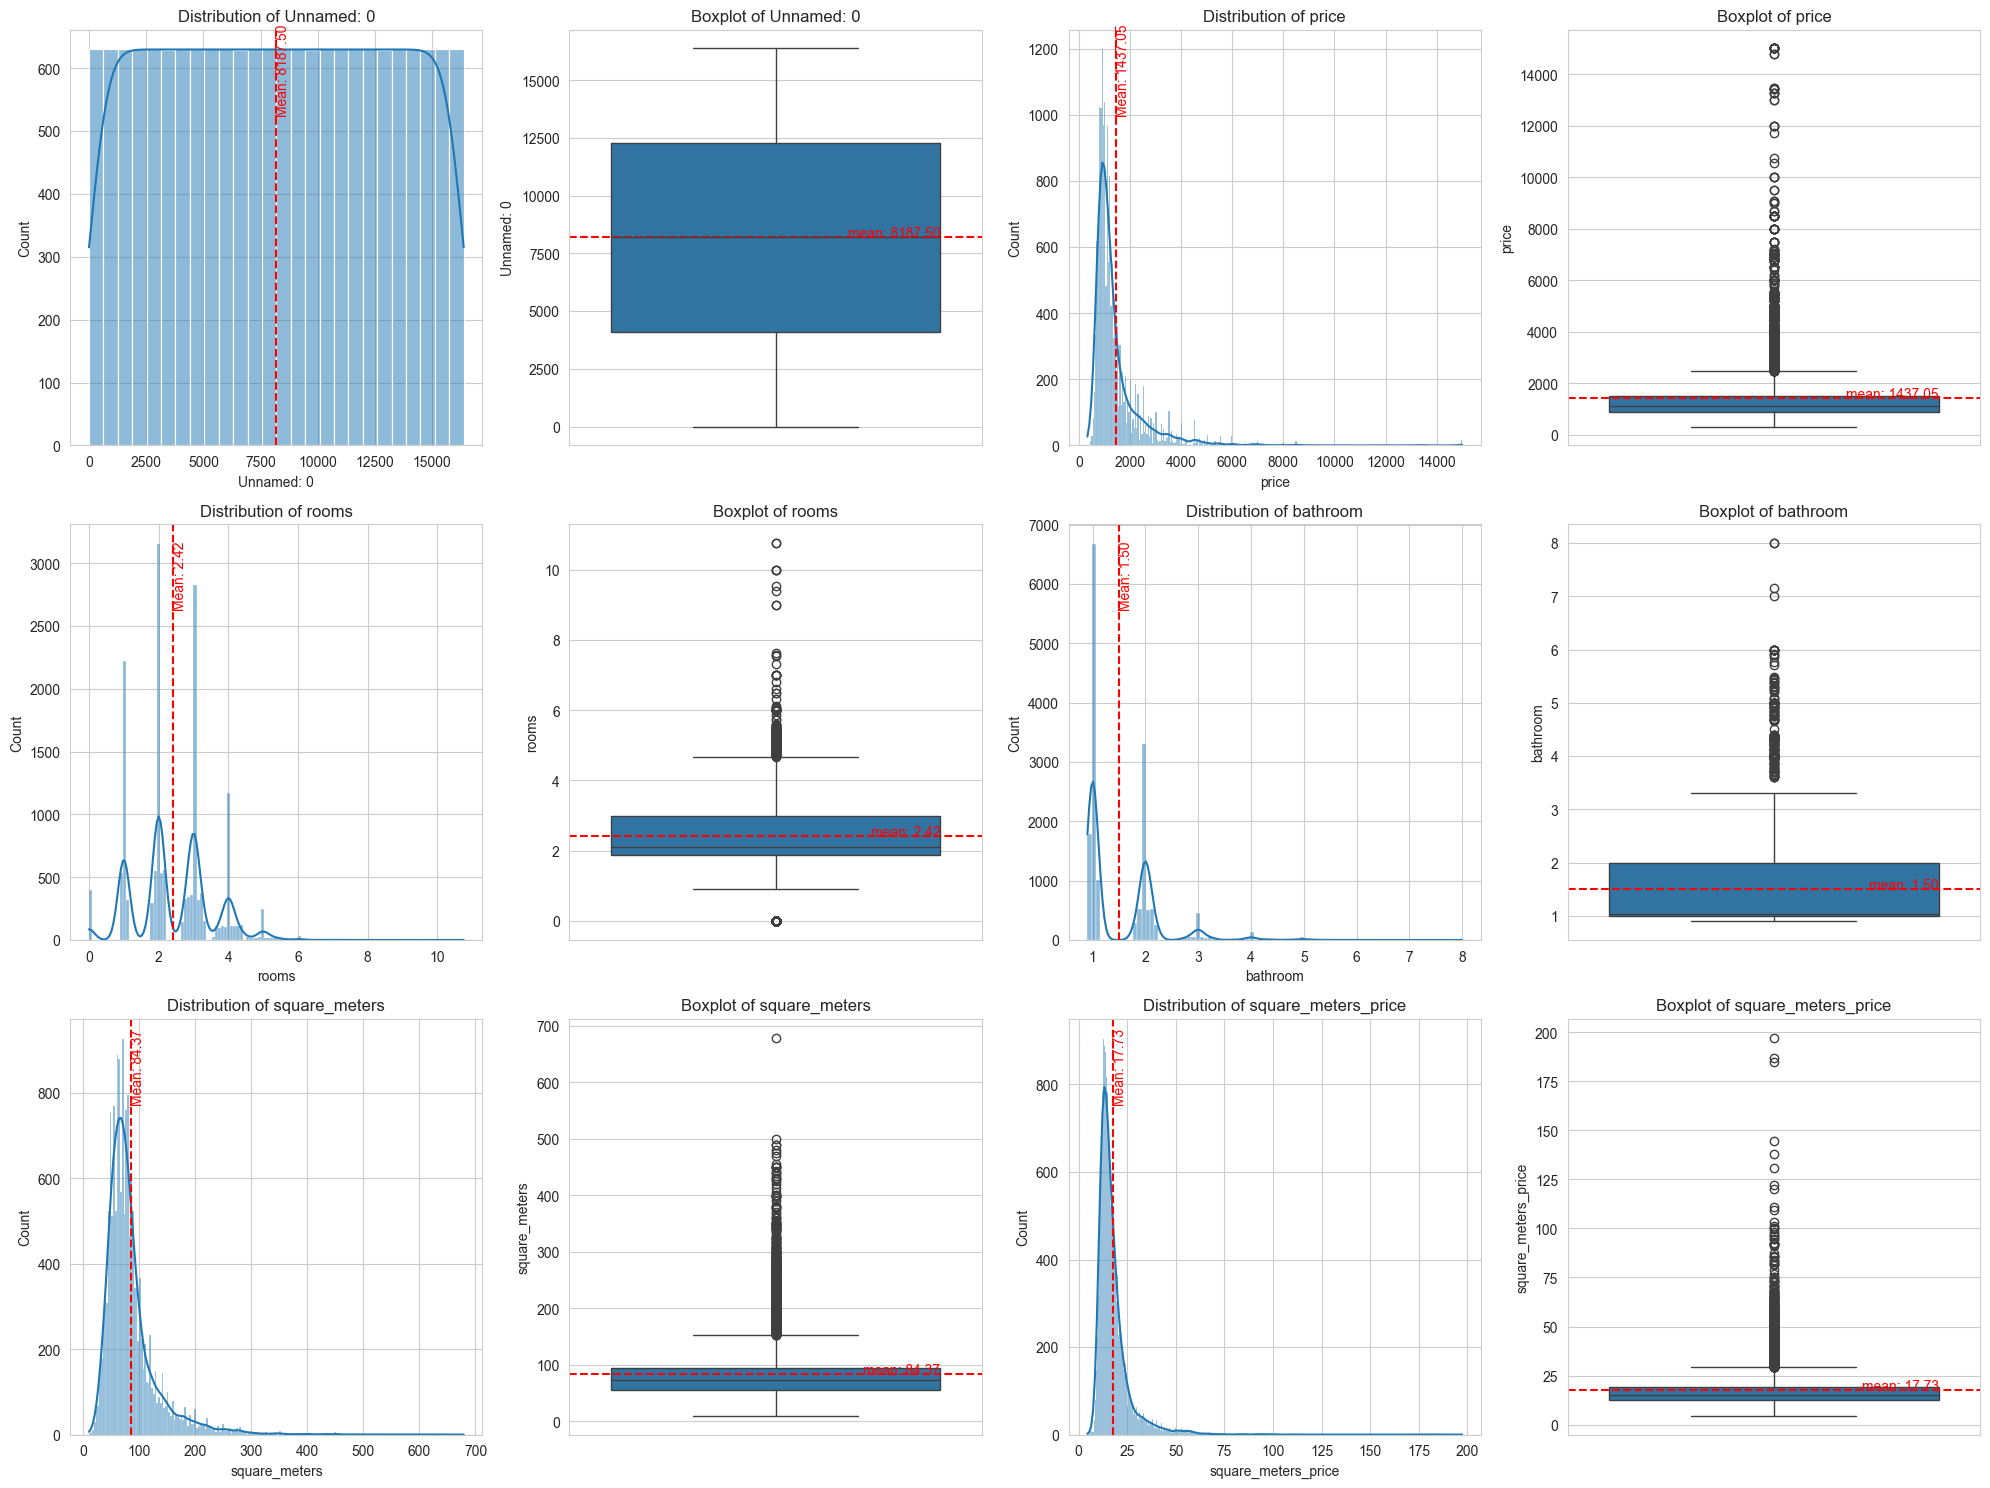

In [66]:
univariate_numerical(df)

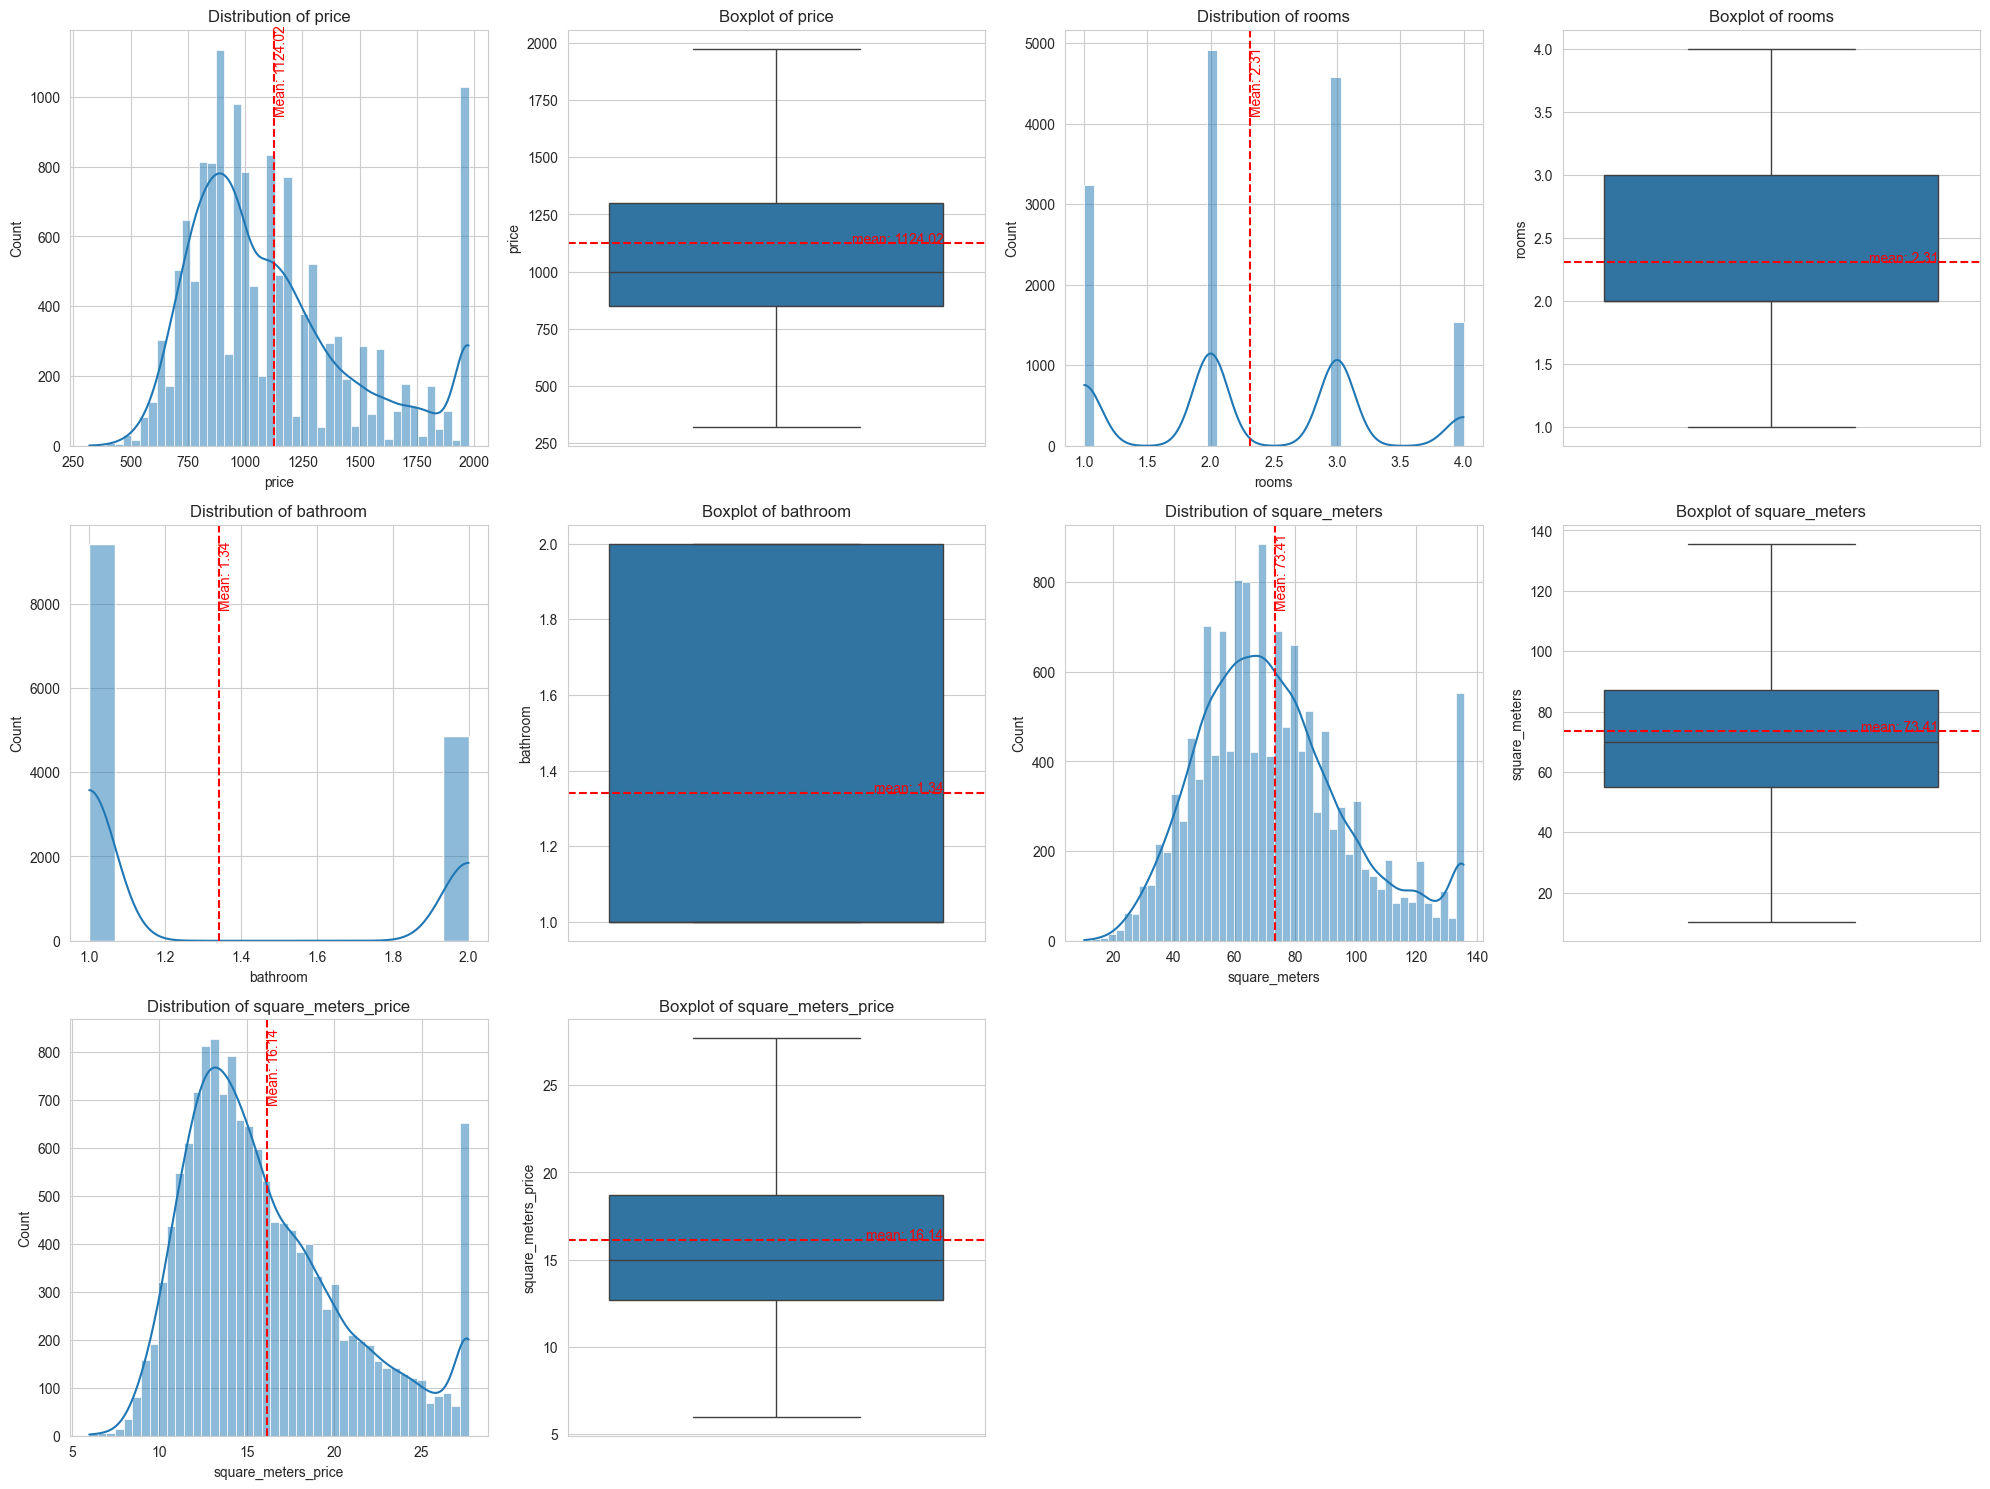

In [67]:
univariate_numerical(df6)

- 'price', 'square_meters' and 'square_meters_price' variables are right skewed and reflect the effect of capping outliers to upper whysker.
- Comparing original data (df) vs. prepared data (df6) is noticeable how in original data the numerical variables have float type values and many outliers, while in prepared data the numerical variables have integer values and no outliers.

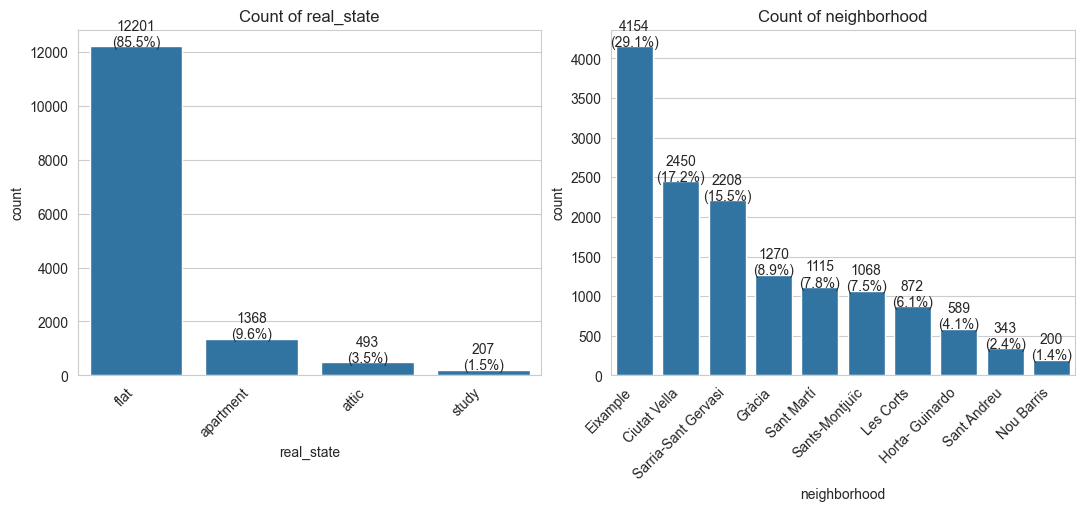

In [68]:
univariate_categorical(df6)

In [69]:
df6.loc[(df6['real_state']=="flat")].describe().T

,count,mean,std,min,25%,50%,75%,max
price,12201.0,1097.272601,344.695856,320.000,850.000,1000.000,1250.000000,1975.000000
rooms,12201.0,2.384067,0.930198,1.000,2.000,2.000,3.000000,4.000000
bathroom,12201.0,1.353004,0.477923,1.000,1.000,1.000,2.000000,2.000000
square_meters,12201.0,74.623287,24.862834,13.181,56.559,70.902,88.388000,135.660000
square_meters_price,12201.0,15.435230,4.183763,6.001,12.465,14.516,17.647059,27.689297


In [70]:
df.loc[(df['real_state']=="flat")].describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,12650.0,8038.174625,4750.342568,0.000000,3887.250000,7965.5000,12162.75000,16375.000
price,12650.0,1311.412490,917.152962,320.000000,865.000000,1050.0000,1352.00000,15000.000
rooms,12351.0,2.551887,1.091363,0.000000,2.000000,2.7380,3.03600,10.754
bathroom,12380.0,1.509471,0.715738,0.900000,1.000000,1.0405,2.00000,8.000
square_meters,12352.0,85.484011,45.657731,10.540000,59.000000,74.7985,95.64450,679.000
square_meters_price,12322.0,15.707694,5.333934,5.555556,12.437625,14.5000,17.67775,103.176


- In the prepared data there are flats units with 4 rooms and 135m2 area.
- In the original data there are flats units with 10.754 rooms and 679m2 area.
- The "large flats" units in the data are asummed as unreal/not-valid data and are affected by Data Preparation.

In [71]:
df6.loc[(df6['neighborhood']=="Eixample")].describe().T

,count,mean,std,min,25%,50%,75%,max
price,4154.0,1186.479779,376.948534,425.000,900.00000,1100.0000,1400.0000,1975.000000
rooms,4154.0,2.403707,0.940306,1.000,2.00000,2.0000,3.0000,4.000000
bathroom,4154.0,1.391911,0.488236,1.000,1.00000,1.0000,2.0000,2.000000
square_meters,4154.0,76.669525,25.506765,16.197,58.00000,74.0505,90.2625,135.660000
square_meters_price,4154.0,16.357695,4.795151,6.074,12.79825,15.0455,19.1155,27.689297


- The categorical variables are not balanced, with 85.5% of properties as "flats" and 78.5% of units concentrated in 50% of the sample neighbourhoods
- 75% of flats units have up to 3 bedrooms and up to 2 bathrooms with an average size of 85.48m2.
- 75% of the units in Eixample have up to 3 bedrooms and up to 2 bathrooms with an average size of 80.21m2.

### Bivariate Analysis

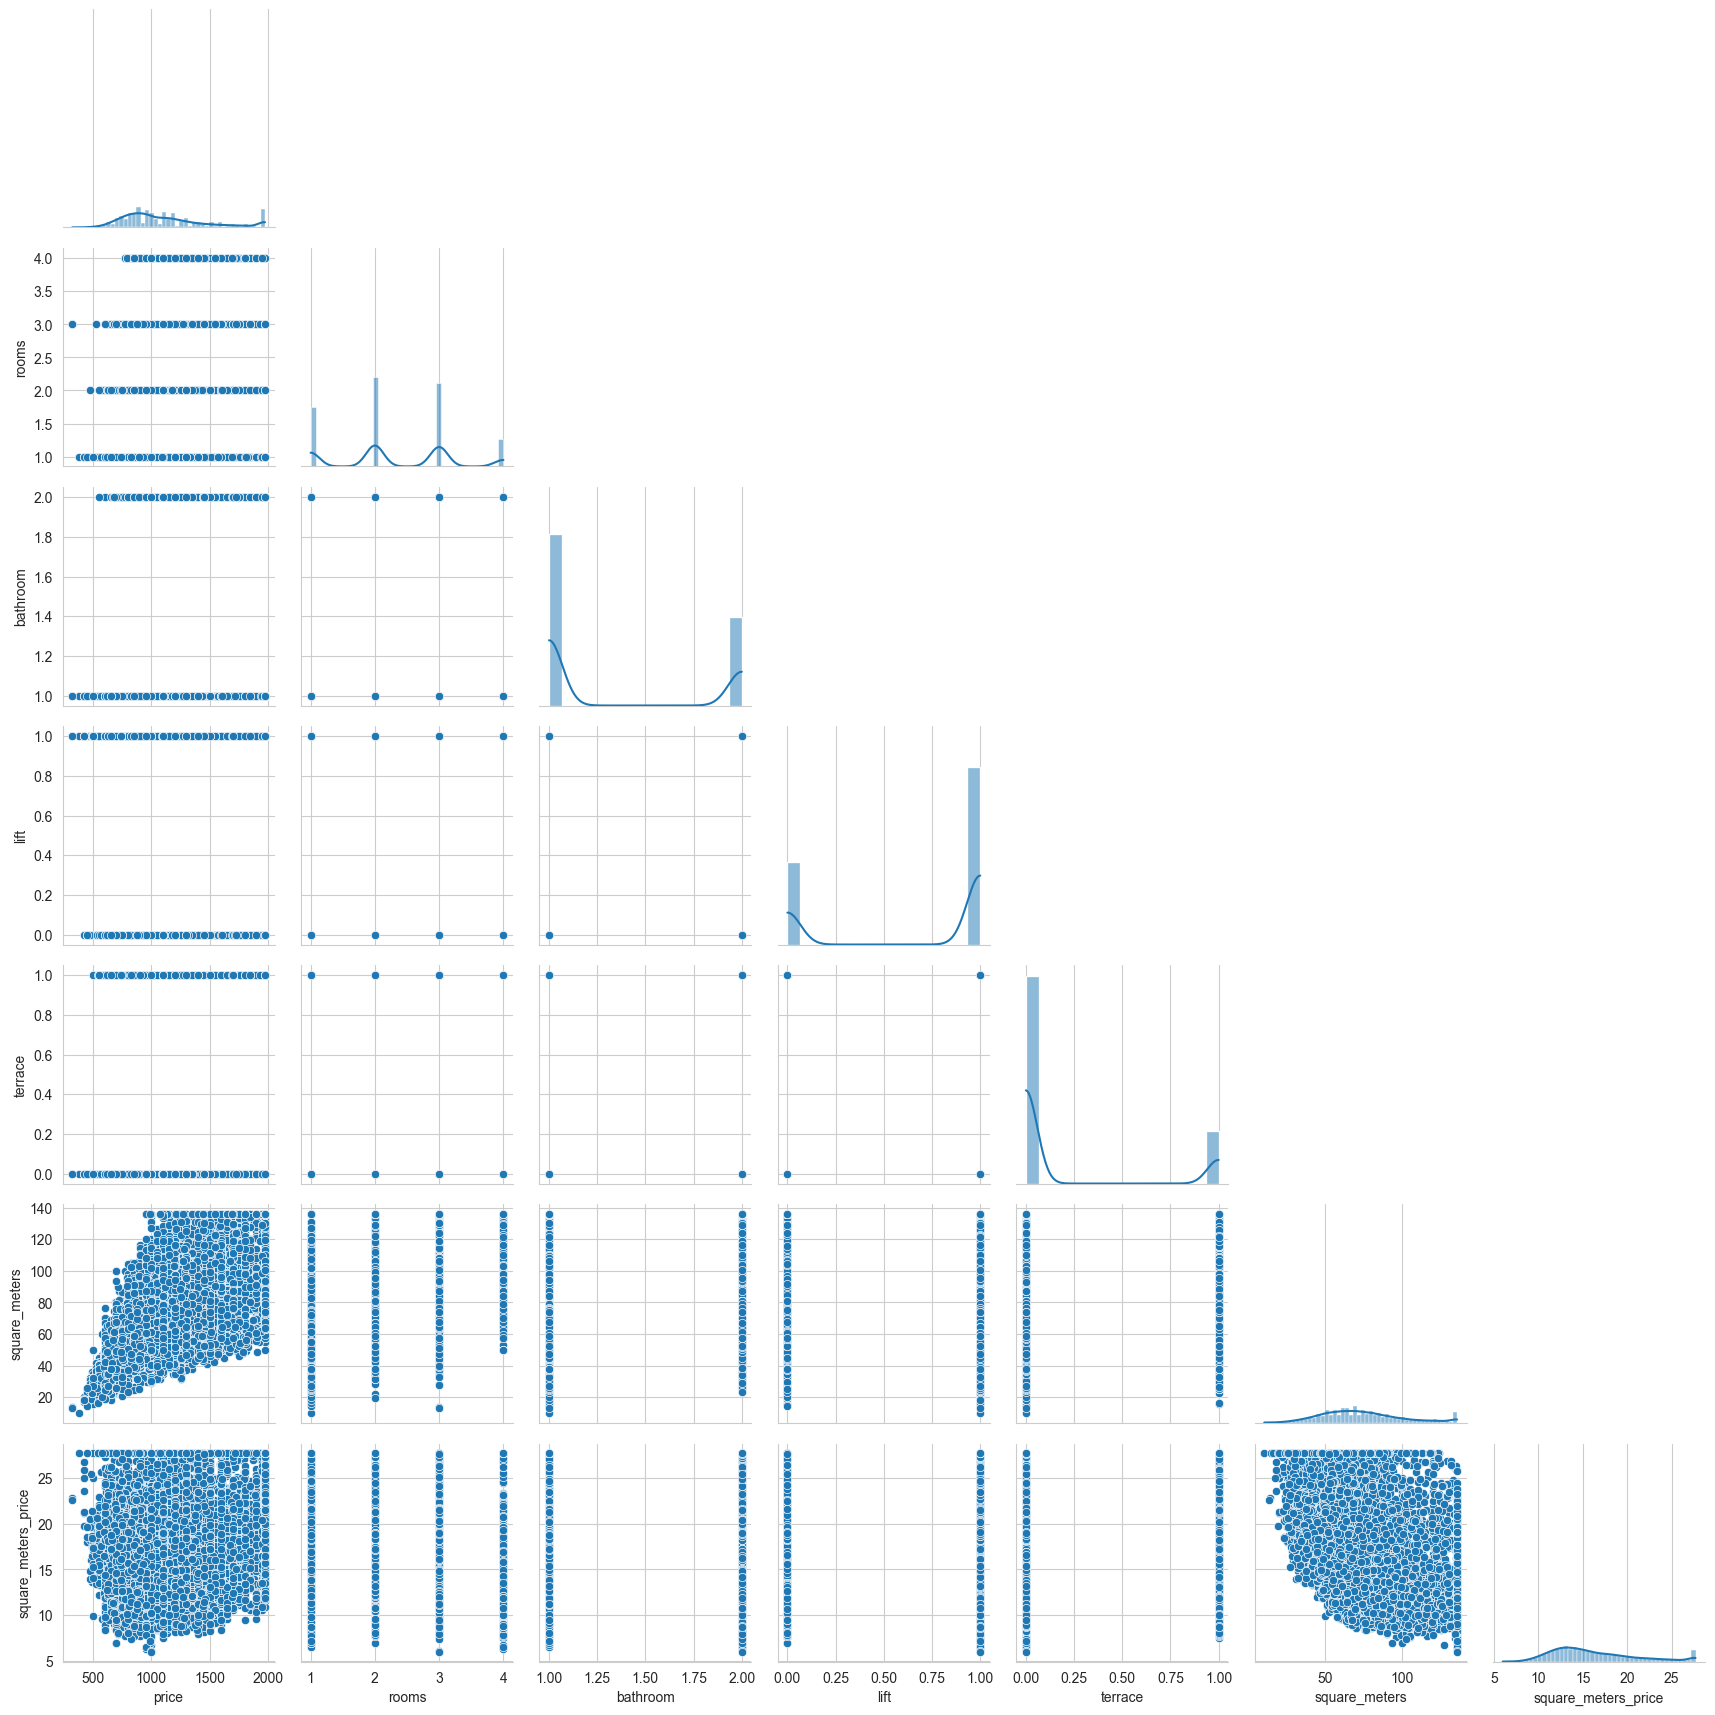

In [72]:
# Create a PairGrid
g = sns.PairGrid(df6, corner=True)

# Map different plots to the grid
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot,kde=True)

# Show the plot
plt.show()

In [73]:
# Calculate correlation matrix
corr_matrix = df6.select_dtypes(include=np.number).corr()

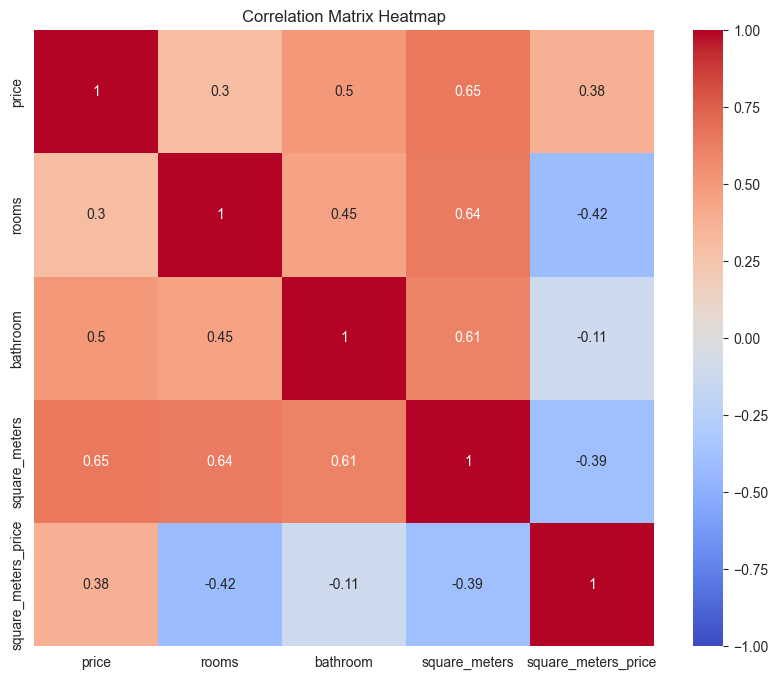

In [74]:
# Plot correlation matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [75]:
# Display the sorted correlation table
corr_unstacked = corr_matrix.unstack() # Unstack the correlation matrix
corr_unstacked = corr_unstacked.reset_index() # Reset the index to get 'variable1' and 'variable2' as columns
corr_unstacked.columns = ['variable1', 'variable2', 'correlation']# Rename the columns for better understanding
corr_unstacked = corr_unstacked[corr_unstacked['variable1'] != corr_unstacked['variable2']] # Remove self-correlations by filtering out rows where variable1 == variable2
corr_unstacked = corr_unstacked.drop_duplicates(subset=['correlation']) # Drop duplicates to keep only one entry per variable pair
sorted_corr = corr_unstacked.sort_values(by='correlation', key=abs, ascending=False) # Sort the DataFrame by the absolute value of correlation
#sorted_corr # Display the sorted correlation table

In [76]:
# Define a function to categorize the correlation level
def categorize_correlation(correlation):
    abs_corr = abs(correlation) * 100  # Convert to percentage for easier comparison
    if abs_corr < 30:
        return 'Negligible'
    elif 30 <= abs_corr < 50:
        return 'Low'
    elif 50 <= abs_corr < 70:
        return 'Moderate'
    elif 70 <= abs_corr < 90:
        return 'High'
    else:
        return 'Very High'


In [77]:
# Apply the function to create the corr_lvl column
sorted_corr['corr_lvl'] = sorted_corr['correlation'].apply(categorize_correlation)
sorted_corr['corr_lvl'].value_counts()


corr_lvl
Low           5
Moderate      4
Negligible    1
Name: count, dtype: int64

In [78]:
sorted_corr

,variable1,variable2,correlation,corr_lvl
3,price,square_meters,0.651214,Moderate
8,rooms,square_meters,0.635150,Moderate
13,bathroom,square_meters,0.608319,Moderate
2,price,bathroom,0.503768,Moderate
7,rooms,bathroom,0.451065,Low
9,rooms,square_meters_price,-0.416305,Low
19,square_meters,square_meters_price,-0.391874,Low
4,price,square_meters_price,0.381253,Low
1,price,rooms,0.304009,Low
14,bathroom,square_meters_price,-0.111716,Negligible


- There are no couple of variables with high correlation (>75%)

Top 3 neighborhood by price mean value are: Sarria-Sant Gervasi,Eixample,Les Corts


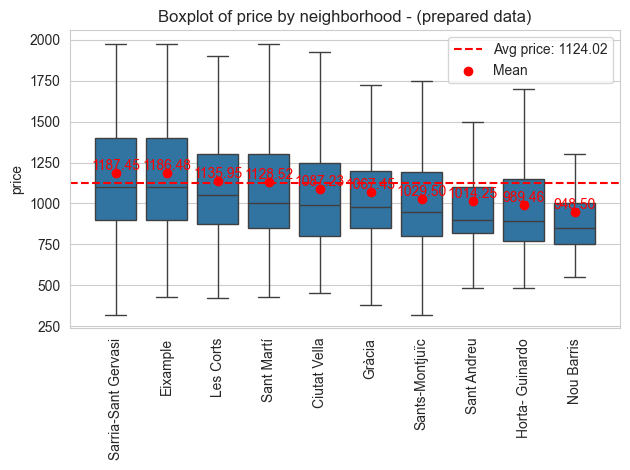

In [79]:
boxplot_by_group(df6, 'neighborhood', 'price', False, df_name="(prepared data)")

Top 3 neighborhood by square_meters mean value are: Eixample,Sarria-Sant Gervasi,Les Corts


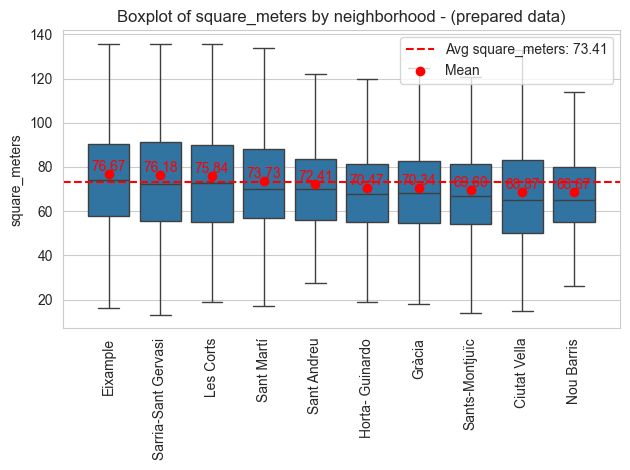

In [80]:
boxplot_by_group(df6, 'neighborhood', 'square_meters', False, df_name="(prepared data)")

Top 3 neighborhood by square_meters_price mean value are: Ciutat Vella,Sarria-Sant Gervasi,Eixample


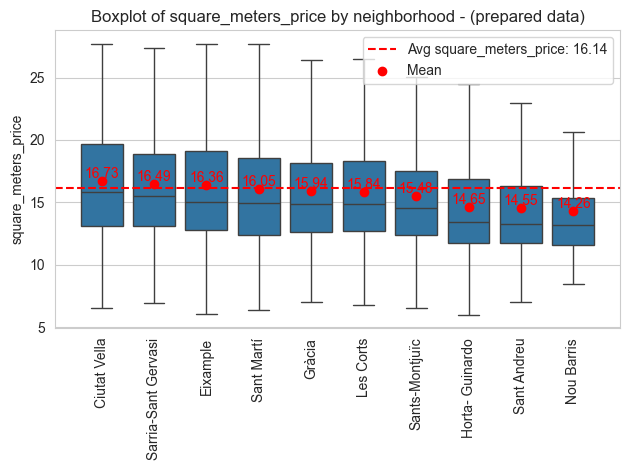

In [81]:
boxplot_by_group(df6, 'neighborhood', 'square_meters_price', False, df_name="(prepared data)")

Top 3 real_state by price mean value are: apartment,attic,flat


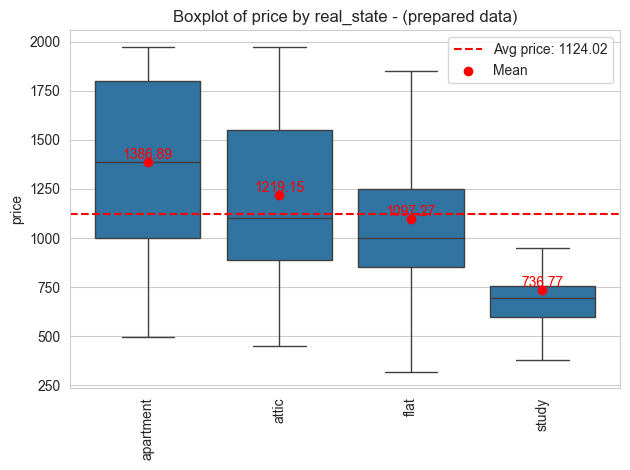

In [82]:
boxplot_by_group(df6, 'real_state', 'price', False, df_name="(prepared data)")

Top 3 real_state by square_meters mean value are: flat,attic,apartment


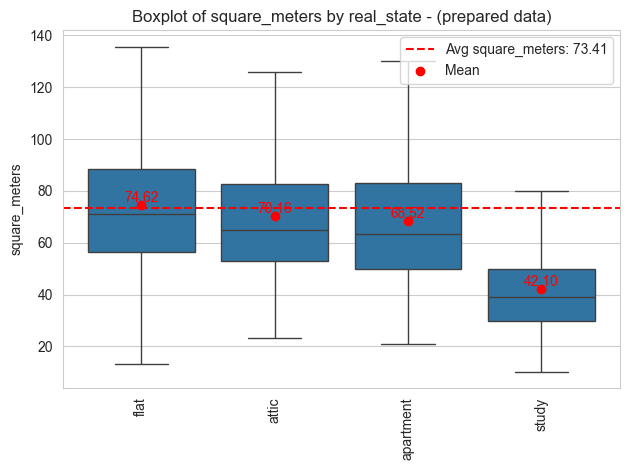

In [83]:
boxplot_by_group(df6, 'real_state', 'square_meters', False, df_name="(prepared data)")

Top 3 real_state by square_meters_price mean value are: apartment,study,attic


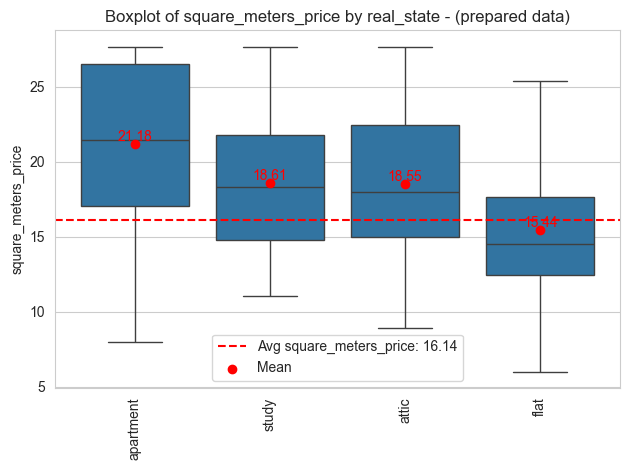

In [84]:
boxplot_by_group(df6, 'real_state', 'square_meters_price', False, df_name="(prepared data)")

- Top 3 neighborhood by price mean value are: Sarria-Sant Gervasi,Eixample,Les Corts
- Top 3 neighborhood by square_meters mean value are: Eixample,Sarria-Sant Gervasi,Les Corts
- Top 3 neighborhood by square_meters_price mean value are: Ciutat Vella,Sarria-Sant Gervasi,Eixample
- Top 3 real_state by price mean value are: apartment,attic,flat
- Top 3 real_state by square_meters mean value are: flat,attic,apartment
- Top 3 real_state by square_meters_price mean value are: apartment,study,attic
- From the perspective of price per square meter, the most attractive type of unit according to this data could be the **flat**, with an average surface area of ​74.62 m2 (just over the average 73.41 m2) and a price per square meter of 15.44 below the average (16.14)

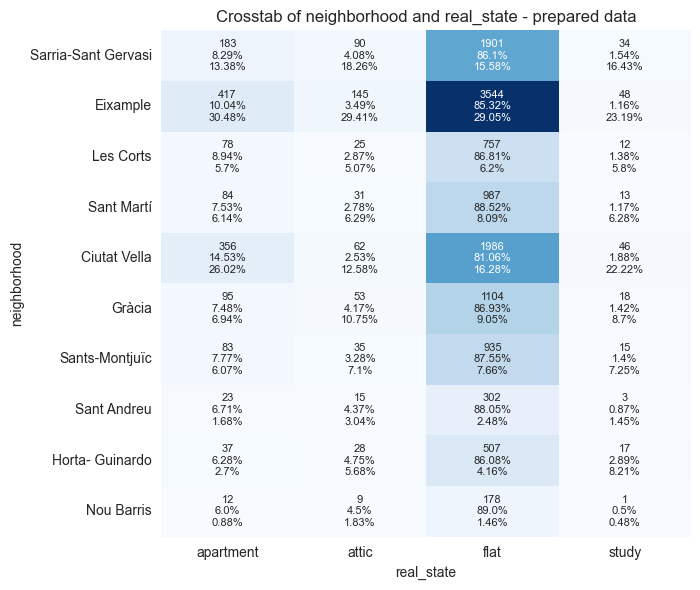

In [85]:
plot_crosstab_heat_perc(df6, var_interest='real_state',df_name="prepared data")

- There are 3544 flats in Eixample, being the most popular unit type and neighborhood combination, with 85.32% of the units in Eixample being flats, and 29.05% of all flats are located at Eixample. 
- Across all neighborhoods, the unit type "flat" is the most popular with at least 85.32% of units by neighborhood

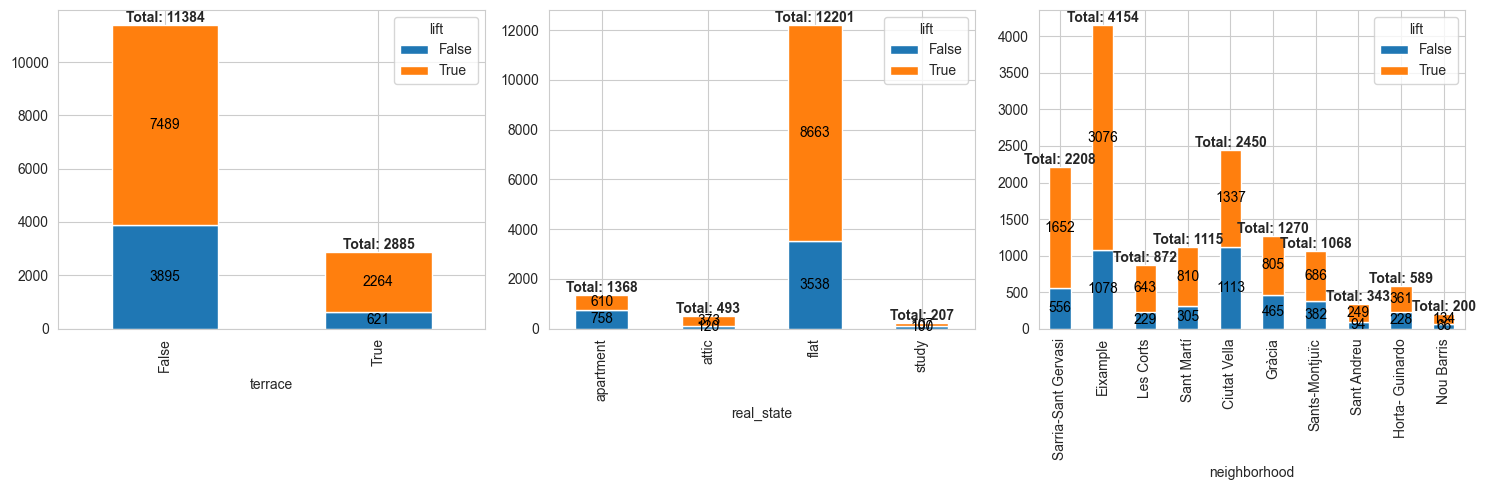

In [86]:
plot_crosstab_bar_count(df6, var_interest='lift')

- Most types of units have a lift, in the case of flats the proportion is 71%

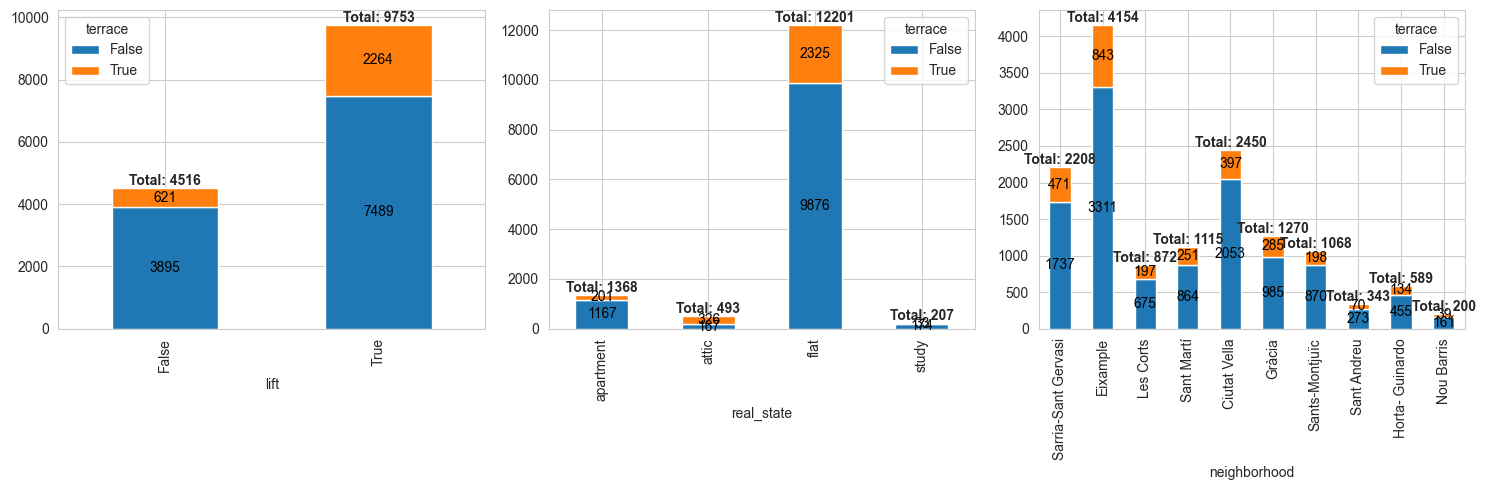

In [87]:
plot_crosstab_bar_count(df6, var_interest='terrace')

- Units with a terrace on the other hand, seem to be rare and very few have one

# Exploratory Data Analysis Consolidated Notes

**Functions**
- univariate_numerical(data): Function to generate two plots for each numerical variable. Histplot for variable distribution. Boxplot for statistical summary
- univariate_categorical(data): Function to generate countplot for each categorical variable. Labeled with count and percentage
- plot_crosstab_bar_count(df, var_interest): Function to create a barplot of crosstab of the variable of interest vs each of the rest of categorical variables. Labeled with counts
- plot_crosstab_heat_perc(df, var_interest): Function to create a heatmap of crosstab of the variable of interest vs each of the rest of catagorical variables. Labeled with counts, percentage by row, percentage by column
- boxplot_by_group(df, group, var, outliers): boxplot for a numerical variable of interest vs a categorical variable. with or without outliers. includes data mean and mean by category
- side_by_side_boxplot(df1, df2, group, var, outliers, title1, title2): to present two side by side boxplot_by_group

**Univariate Analysis**
- 'price', 'square_meters' and 'square_meters_price' variables are right skewed and reflect the effect of capping outliers to upper whysker.
- Comparing original data (df) vs. prepared data (df6) is noticeable how in original data the numerical variables have float type values and many outliers, while in prepared data the numerical variables have integer values and no outliers.
- In the prepared data there are flats units with 4 rooms and 135m2 area.
- In the original data there are flats units with 10.754 rooms and 679m2 area.
- The "large flats" units in the data are asummed as unreal/not-valid data and are affected by Data Preparation.
- The categorical variables are not balanced, with 85.5% of properties as "flats" and 78.5% of units concentrated in 50% of the sample neighbourhoods
- 75% of flats units have up to 3 bedrooms and up to 2 bathrooms with an average size of 85.48m2.
- 75% of the units in Eixample have up to 3 bedrooms and up to 2 bathrooms with an average size of 80.21m2.

**Bivariate Analysis**
- There are no couple of variables with high correlation (>75%)
- Top 3 neighborhood by price mean value are: Sarria-Sant Gervasi,Eixample,Les Corts
- Top 3 neighborhood by square_meters mean value are: Sarria-Sant Gervasi,Les Corts,Eixample
- Top 3 neighborhood by square_meters_price mean value are: Ciutat Vella,Sarria-Sant Gervasi,Eixample
- Top 3 real_state by price mean value are: apartment,attic,flat
- Top 3 real_state by square_meters mean value are: flat,attic,apartment
- Top 3 real_state by square_meters_price mean value are: apartment,study,attic
- From the perspective of price per square meter, the most attractive type of unit according to this data could be the **flat**, with an average surface area of ​74.62 m2 (just over the average 73.41 m2) and a price per square meter of 15.44 below the average (16.14)
- There are 3544 flats in Eixample, being the most popular unit type and neighborhood combination, with 85.32% of the units in Eixample being flats, and 29.05% of all flats are located at Eixample. 
- Across all neighborhoods, the unit type "flat" is the most popular with at least 85.32% of units by neighborhood
- Most types of units have a lift, in the case of flats the proportion is 71%
- Units with a terrace on the other hand, seem to be rare and very few have one

# 5. Modeling
Selecting and applying appropriate machine learning or statistical models. This step includes training, validating, and fine-tuning models to optimize their performance

### Modeling Functions

In [88]:
# Define a function to evaluate and return the model's metrics
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    metrics = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "R2 Score": r2_score(y_test, y_pred)
    }
    return metrics

In [89]:
def evaluate_models_with_cv(models, X_train, y_train, X_test, y_test):
    """
    Evaluates multiple regression models using cross-validation and final test set performance.
    
    Parameters:
    models: list of tuples (model_name, model_instance)
    X_train, y_train: training data
    X_test, y_test: test data

    Returns:
    - results_df: DataFrame containing CV and test metrics for each model
    - trained_models: Dictionary of trained models for future use
    """

    results_list = []  # List to store model results
    trained_models = {}  # Dictionary to store trained models
    
    # Define 5-fold cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=1)

    for name, model in models:
        # Perform cross-validation on training set
        cv_results = cross_validate(
            model, X_train, y_train, 
            scoring=["neg_mean_absolute_error", "neg_mean_squared_error", "r2"],
            cv=kfold, return_train_score=False
        )

        # Extract mean values and convert negatives to positives
        train_mae = -cv_results["test_neg_mean_absolute_error"].mean()
        train_mse = -cv_results["test_neg_mean_squared_error"].mean()
        train_rmse = np.sqrt(train_mse)
        train_r2 = cv_results["test_r2"].mean()

        # Append CV results to list
        results_list.append({
            "Model": f"{name}_CV",
            "MAE": train_mae,
            "MSE": train_mse,
            "RMSE": train_rmse,
            "R2 Score": train_r2
        })

        # Train model on full training data and evaluate on test set
        model.fit(X_train, y_train)
        trained_models[name] = model  # Store trained model

        y_pred = model.predict(X_test)
        test_mae = mean_absolute_error(y_test, y_pred)
        test_mse = mean_squared_error(y_test, y_pred)
        test_rmse = np.sqrt(test_mse)
        test_r2 = r2_score(y_test, y_pred)

        # Append test set results to list
        results_list.append({
            "Model": f"{name}_Test",
            "MAE": test_mae,
            "MSE": test_mse,
            "RMSE": test_rmse,
            "R2 Score": test_r2
        })

    # Convert results list to DataFrame
    results_cv = pd.DataFrame(results_list)
    
    return results_cv, trained_models


In [90]:
def univariate_numerical_y(y):
    """
    Function to generate two plots for the numerical variable y:
    - Histogram for variable distribution
    - Boxplot for statistical summary
    """
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Histogram
    axes[0].hist(y, bins=30, color='blue', alpha=0.7)
    axes[0].set_title('Histogram of y')
    axes[0].set_xlabel('Value')
    axes[0].set_ylabel('Frequency')

    # Boxplot
    axes[1].boxplot(y, vert=False)
    axes[1].set_title('Boxplot of y')
    axes[1].set_xlabel('Value')

    plt.tight_layout()
    plt.show()

- Defined function "evaluate_model(model, x_test, y_test)", to evaluate and return the model's metrics into a results dataframe
- Defined function "evaluate_models_with_cv(models, X_train, y_train, X_test, y_test)" to evaluates multiple regression models using cross-validation and final test set performance.
- Defined function "univariate_numerical_y()", to generate two plots (Histogram and Boxplot) for the numerical variable y

## Preparing data for modeling

In [91]:
data=df6.copy()

- Modeling data (data) will be done over a copy of prepared data (df6)

In [92]:
# 1. Specify independent (X) and dependent (y) variables
X = data.drop(["price"], axis=1)
y = data["price"]

# 2. Create dummy variables for categorical features
X = pd.get_dummies(X, columns=['real_state', 'neighborhood'], drop_first=True)  # drop_first=True to avoid multicollinearity

# 3. Convert boolean columns to numeric (0 and 1)
bool_cols = X.select_dtypes(['bool'])
for col in bool_cols.columns:
    X[col] = X[col].astype('int')

# 4. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# 5. Transform and scale right-skewed variables (applied **only to training data to avoid data leakage**)
pt = PowerTransformer(method='yeo-johnson')  # Works with zero/negative values

# Fit only on training data, then transform both training and test data
X_train[['square_meters', 'square_meters_price']] = pt.fit_transform(X_train[['square_meters', 'square_meters_price']])
X_test[['square_meters', 'square_meters_price']] = pt.transform(X_test[['square_meters', 'square_meters_price']])  # Transform only

# 6. Standardize the transformed numerical features (again, to prevent data leakage)
scaler = StandardScaler()
X_train[['square_meters', 'square_meters_price']] = scaler.fit_transform(X_train[['square_meters', 'square_meters_price']])
X_test[['square_meters', 'square_meters_price']] = scaler.transform(X_test[['square_meters', 'square_meters_price']])  # Use the same scaler

# 7. Add a constant to independent variables (after scaling, only for models that need it)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)


In [93]:
# Checking training and test sets.
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (9988, 19)
Shape of test set :  (4281, 19)


In [94]:
X_train.head()

,const,rooms,bathroom,lift,terrace,square_meters,square_meters_price,real_state_attic,real_state_flat,real_state_study,neighborhood_Eixample,neighborhood_Les Corts,neighborhood_Sant Martí,neighborhood_Ciutat Vella,neighborhood_Gràcia,neighborhood_Sants-Montjuïc,neighborhood_Sant Andreu,neighborhood_Horta- Guinardo,neighborhood_Nou Barris
16047,1.0,2,1,1,0,0.163420,0.503709,0,1,0,0,0,0,0,0,0,0,0,0
10334,1.0,1,1,1,0,-1.500990,1.774314,0,1,0,1,0,0,0,0,0,0,0,0
10144,1.0,2,1,0,0,-1.953426,0.850089,0,1,0,0,0,0,0,0,0,0,0,0
8401,1.0,3,1,1,1,1.666115,-0.559885,0,1,0,0,0,0,0,0,0,0,0,0
2041,1.0,3,1,0,1,-0.098884,-1.895277,0,1,0,0,0,0,0,0,0,0,1,0


In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9988 entries, 16047 to 15324
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         9988 non-null   float64
 1   rooms                         9988 non-null   int64  
 2   bathroom                      9988 non-null   int64  
 3   lift                          9988 non-null   int64  
 4   terrace                       9988 non-null   int64  
 5   square_meters                 9988 non-null   float64
 6   square_meters_price           9988 non-null   float64
 7   real_state_attic              9988 non-null   int64  
 8   real_state_flat               9988 non-null   int64  
 9   real_state_study              9988 non-null   int64  
 10  neighborhood_Eixample         9988 non-null   int64  
 11  neighborhood_Les Corts        9988 non-null   int64  
 12  neighborhood_Sant Martí       9988 non-null   int64  
 13  nei

- The dataset contains numerical features with different scales, which may affect algorithms sensitive to scale.
- Several models will be tried, including models that rely on distance-based calculations (Logistic Regression, SVM, KNN) that perform better with standardized data, and also linear models (Linear/Logistic Regression, Ridge, Lasso) that can converge faster with standardized inputs.
- Due the different scales, and models to be evaluated, the data will be standarized:
    - 'price' is the target variable. Standardizing the target (y) is not necessary for most regression models
    - 'rooms' and 'bathrooms' show a discrete distribution, which has peaks at certain integer values. No scaling considered.
    - cathegorical or binary variables such as 'lift' , 'terrace', 'real_state' and 'neighborhood' do not need scaling.
    - 'square_meters' and 'square_meters_price' have right-skewed distributions and will be transformed using PowerTransformer (Yeo-Johnson) before applying StandardScaler.

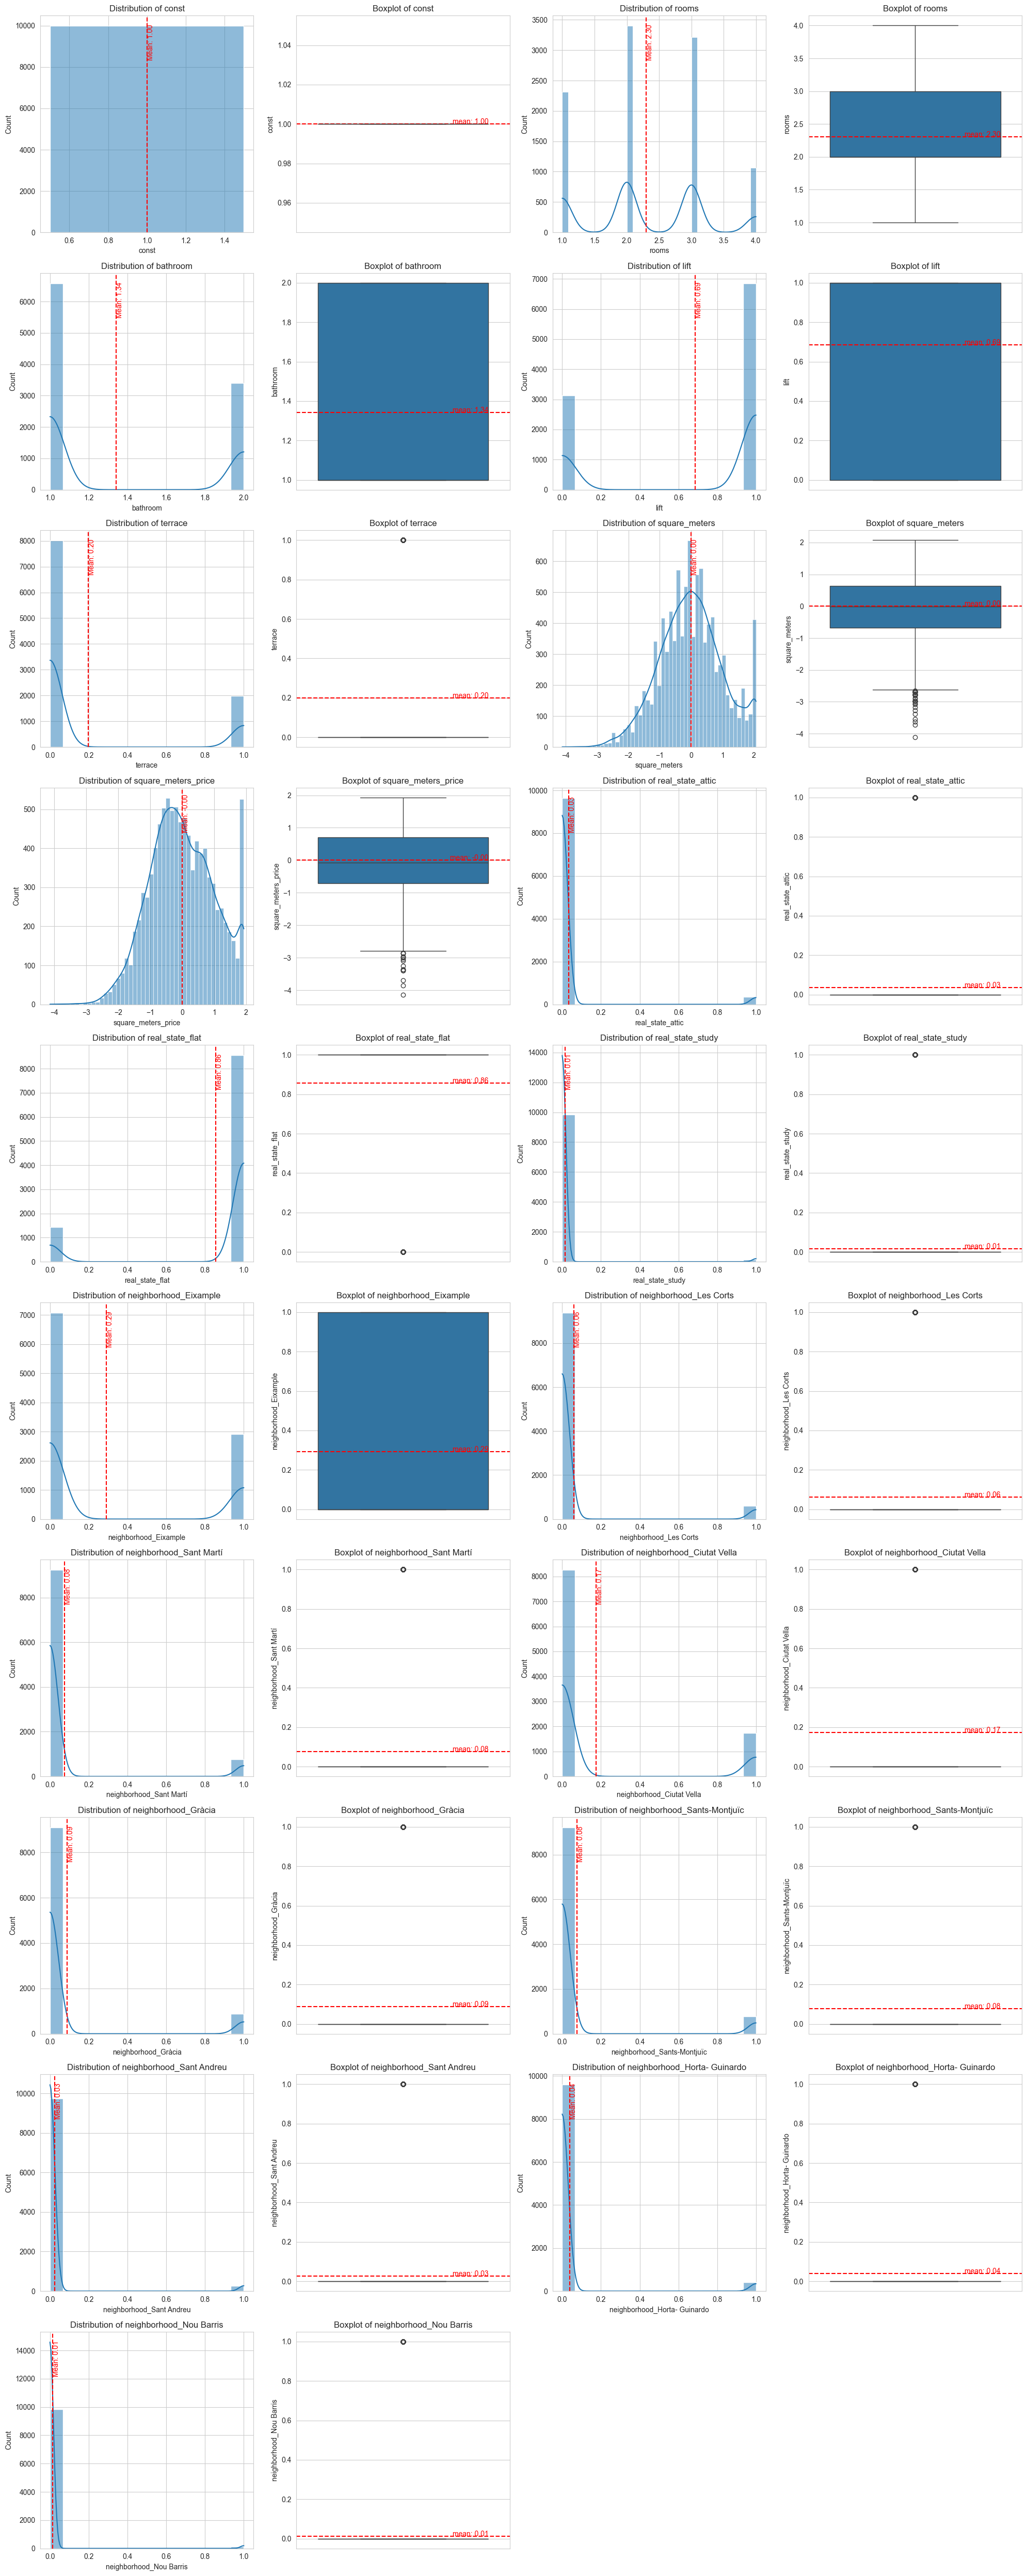

In [96]:
univariate_numerical(X_train)

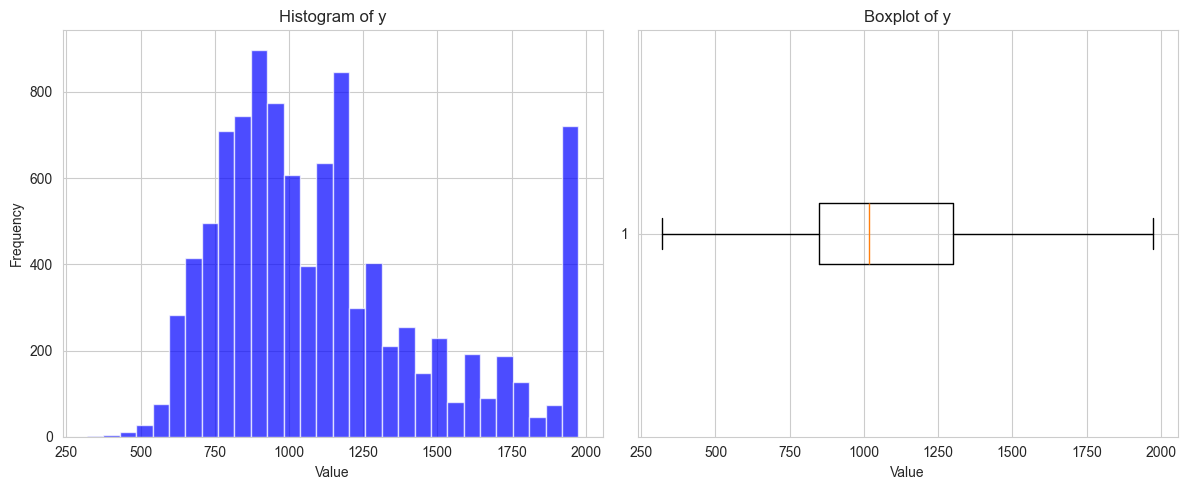

In [97]:
univariate_numerical_y(y_train)

# 6. Evaluation
Assessing the model's performance using metrics such as accuracy, precision, recall, or others relevant to the project. Ensuring the model meets the required standards for deployment.

In [98]:
# Define a dictionary of regression models
regression_models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()
}

- Models to be tested are : Linear Regression, Lasso Regression, Ridge Regression, Decision Tree, Random Forest, K-Nearest Neighbors, and Support Vector Regressor

In [99]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])

- Performance Metrics:
    - **MAE** (Mean Absolute Error): Measures the average magnitude of errors in a set of predictions, without considering their direction.
    - **MSE** (Mean Squared Error): Measures the average of the squares of the errors, giving more weight to larger errors.
    - **RMSE** (Root Mean Squared Error): The square root of MSE, providing error in the same units as the target variable.
    - **R2 Score** (Coefficient of Determination): Indicates how well the model's predictions approximate the real data points. A value closer to 1 indicates a better fit.


In [100]:
%%time
# Loop through each model, train it, evaluate it, and store results
for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    metrics["Model"] = model_name  # Add model name for reference
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

CPU times: total: 20.1 s
Wall time: 22 s


In [101]:
# Display the results DataFrame
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,39.923190,4207.141501,64.862481,0.969883
3,Decision Tree,50.395445,7149.486879,84.554638,0.948820
2,Ridge Regression,67.054647,9179.684362,95.810669,0.934286
0,Linear Regression,67.057076,9180.541068,95.815140,0.934280
1,Lasso Regression,67.493485,9249.945144,96.176635,0.933783
5,K-Nearest Neighbors,74.951133,11475.952189,107.125871,0.917848
6,Support Vector Regressor,98.720296,23091.488357,151.958838,0.834697


In [102]:
results_df.sort_values(by="MAE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,39.923190,4207.141501,64.862481,0.969883
3,Decision Tree,50.395445,7149.486879,84.554638,0.948820
2,Ridge Regression,67.054647,9179.684362,95.810669,0.934286
0,Linear Regression,67.057076,9180.541068,95.815140,0.934280
1,Lasso Regression,67.493485,9249.945144,96.176635,0.933783
5,K-Nearest Neighbors,74.951133,11475.952189,107.125871,0.917848
6,Support Vector Regressor,98.720296,23091.488357,151.958838,0.834697


In [103]:
results_df.sort_values(by="MSE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,39.923190,4207.141501,64.862481,0.969883
3,Decision Tree,50.395445,7149.486879,84.554638,0.948820
2,Ridge Regression,67.054647,9179.684362,95.810669,0.934286
0,Linear Regression,67.057076,9180.541068,95.815140,0.934280
1,Lasso Regression,67.493485,9249.945144,96.176635,0.933783
5,K-Nearest Neighbors,74.951133,11475.952189,107.125871,0.917848
6,Support Vector Regressor,98.720296,23091.488357,151.958838,0.834697


In [104]:
results_df.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
4,Random Forest,39.923190,4207.141501,64.862481,0.969883
3,Decision Tree,50.395445,7149.486879,84.554638,0.948820
2,Ridge Regression,67.054647,9179.684362,95.810669,0.934286
0,Linear Regression,67.057076,9180.541068,95.815140,0.934280
1,Lasso Regression,67.493485,9249.945144,96.176635,0.933783
5,K-Nearest Neighbors,74.951133,11475.952189,107.125871,0.917848
6,Support Vector Regressor,98.720296,23091.488357,151.958838,0.834697


- Random Forest metrics: Lowest MAE, lowest RMSE, and highest R².
- Random Forest is the best performer overall, indicating strong predictive accuracy and low error.
- Decision Tree metrics: Moderate errors with a good R².
- Decision Tree is a strong candidate, although slightly behind Random Forest.
- Ridge, Linear, and Lasso Regression metrics are consistent with each other, but their performance is noticeably lower than the tree-based methods. They might not be ideal for further tuning if the goal is the best predictive performance.
- For hyperparameter tuning and further validation, **Random Forest** and **Decision Tree stand** out as the best candidates due to their superior performance metrics.
- While the linear models (Ridge, Linear, and Lasso) can serve as strong baselines, they do not match the predictive accuracy of the tree-based models.
- K-Nearest Neighbors and SVR appear less promising for further development on this dataset.

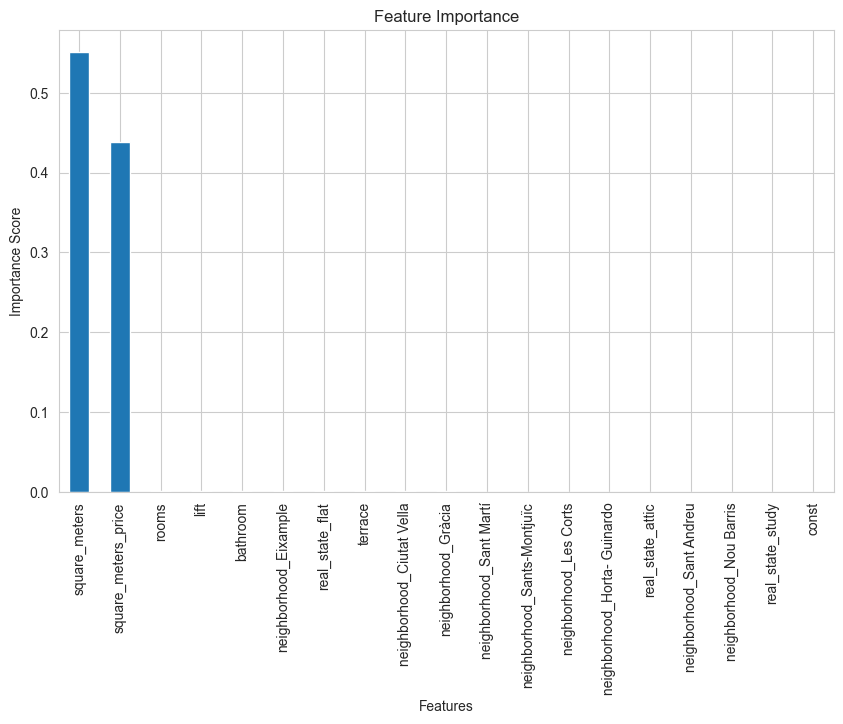

In [105]:
# Define the model with the selected hyperparameters
RandomForest = RandomForestRegressor()

# Train the model on the entire training dataset
RandomForest.fit(X_train, y_train)

# Feature importance
feature_importances = pd.Series(RandomForest.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()

- From the feature importance plot, square_meters is the most significant variable, followed by square_meters_price.
- Since price is directly derived from square_meters * square_meters_price, including both may not add new information and could introduce redundancy.
- It makes no sence to ask end user square_meters and square_meters_price to "predict" price.
- **NEW MODELS** will be evaluated, with the feature **square_meters_price DROPED** from the data

In [108]:
# Drop the constant column
X_train_vif = X_train.drop(columns=['const'])

In [109]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])],
    index=X_train_vif.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

rooms                           11.080074
bathroom                        11.296229
lift                             3.449079
terrace                          1.346301
square_meters                    2.099052
square_meters_price              1.568111
real_state_attic                 1.352480
real_state_flat                  9.137370
real_state_study                 1.165991
neighborhood_Eixample            2.586087
neighborhood_Les Corts           1.328271
neighborhood_Sant Martí          1.425954
neighborhood_Ciutat Vella        1.887352
neighborhood_Gràcia              1.483803
neighborhood_Sants-Montjuïc      1.441272
neighborhood_Sant Andreu         1.144297
neighborhood_Horta- Guinardo     1.242755
neighborhood_Nou Barris          1.077936
dtype: float64



- Although its VIF (1.568) is low (suggesting no strong collinearity within the dataset), the mathematical dependence between square_meters and square_meters_price suggests redundancy.
- This means the model could overestimate the importance of one feature over another and lead to unstable coefficient estimates.
- By keeping only square_meters, the model remains more interpretable, focusing on how space affects price rather than a derived variable.
- Noted features 'rooms' and 'bathroom' present high multicolinearity and will be also droped from modeling

In [110]:
def preprocess_data(data, target_feature, drop_features, scale_features, test_size=0.30, random_state=1):
    """
    Preprocesses the dataset by handling categorical variables, boolean conversion,
    splitting data, transforming skewed features, standardizing, and adding a constant.
    
    Parameters:
    - data: DataFrame containing the full dataset.
    - target_feature: Name of the dependent variable.
    - drop_features: List of features to drop from the dataset.
    - scale_features: List of numerical features to transform and scale.
    - test_size: Proportion of the dataset to include in the test split.
    - random_state: Seed for reproducibility.
    
    Returns:
    - X_train, X_test, y_train, y_test: Processed training and test datasets.
    """
    # 1. Specify independent (X) and dependent (y) variables
    X = data.drop(drop_features, axis=1)
    y = data[target_feature]
    
    # 2. Create dummy variables for categorical features
    categorical_features = ['real_state', 'neighborhood']
    X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
    
    # 3. Convert boolean columns to numeric (0 and 1)
    bool_cols = X.select_dtypes(['bool']).columns
    X[bool_cols] = X[bool_cols].astype(int)
    
    # 4. Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # 5. Transform and scale right-skewed variables (PowerTransformer for skewed data)
    pt = PowerTransformer(method='yeo-johnson')
    X_train[scale_features] = pt.fit_transform(X_train[scale_features])
    X_test[scale_features] = pt.transform(X_test[scale_features])
    
    # 6. Standardize the transformed numerical features
    scaler = StandardScaler()
    X_train[scale_features] = scaler.fit_transform(X_train[scale_features])
    X_test[scale_features] = scaler.transform(X_test[scale_features])
    
    # 7. Add a constant to independent variables (after scaling)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    return X_train, X_test, y_train, y_test


- Defined function "preprocess_data(data, target_feature, drop_features, scale_features, test_size=0.30, random_state=1)", to iterate on the data preparation for modeling

In [111]:
X_train, X_test, y_train, y_test= preprocess_data(data, ['price'], ['price','square_meters_price'], ['square_meters'], test_size=0.30, random_state=1)

- Data preparation droping the feature square_meters_price

In [112]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])

In [113]:
%%time
# Loop through each model, train it, evaluate it, and store results
for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    metrics["Model"] = model_name  # Add model name for reference
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

CPU times: total: 24 s
Wall time: 36.3 s


In [114]:
# Display the results DataFrame
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,192.829593,62956.269056,250.910879,0.549322
2,Ridge Regression,192.833577,62957.371541,250.913076,0.549314
1,Lasso Regression,193.843038,63504.450907,252.000895,0.545397
4,Random Forest,187.635650,64290.983226,253.556667,0.539767
5,K-Nearest Neighbors,193.531091,67397.543929,259.610369,0.517528
6,Support Vector Regressor,210.787271,86373.521736,293.893725,0.381687
3,Decision Tree,221.494081,97612.937235,312.430692,0.301228


- Linear Regression and Ridge Regression performed the best in terms of R² Score
- Feature selection will be performed to reduce multicollinearity.

In [115]:
# Drop the constant column
X_train_vif = X_train.drop(columns=['const'])

vif_series = pd.Series(
    [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])],
    index=X_train_vif.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

rooms                           10.837814
bathroom                        10.048749
lift                             3.432845
terrace                          1.338510
square_meters                    1.609008
real_state_attic                 1.348520
real_state_flat                  8.486485
real_state_study                 1.147954
neighborhood_Eixample            2.580478
neighborhood_Les Corts           1.328092
neighborhood_Sant Martí          1.425753
neighborhood_Ciutat Vella        1.887234
neighborhood_Gràcia              1.483735
neighborhood_Sants-Montjuïc      1.439393
neighborhood_Sant Andreu         1.141826
neighborhood_Horta- Guinardo     1.235647
neighborhood_Nou Barris          1.075084
dtype: float64



In [116]:
X_train, X_test, y_train, y_test= preprocess_data(data, ['price'], ['price','square_meters_price','rooms'], ['square_meters'], test_size=0.30, random_state=1)

- Data preparation droping the feature 'rooms' due high multicolinearity

In [117]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])

In [118]:
%%time
# Loop through each model, train it, evaluate it, and store results
for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    metrics["Model"] = model_name  # Add model name for reference
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

CPU times: total: 20.6 s
Wall time: 24.1 s


In [119]:
# Display the results DataFrame
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,197.545690,65051.360633,255.051682,0.534324
2,Ridge Regression,197.554341,65051.439986,255.051838,0.534323
1,Lasso Regression,198.916759,65589.695703,256.104853,0.530470
5,K-Nearest Neighbors,198.173137,69939.496099,264.460765,0.499331
4,Random Forest,199.315133,71179.493457,266.794853,0.490455
6,Support Vector Regressor,211.486036,86079.067618,293.392344,0.383795
3,Decision Tree,226.931121,98802.512752,314.328670,0.292713


In [120]:
# Drop the constant column
X_train_vif = X_train.drop(columns=['const'])

vif_series = pd.Series(
    [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])],
    index=X_train_vif.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

bathroom                        8.222008
lift                            3.418865
terrace                         1.338489
square_meters                   1.354581
real_state_attic                1.323041
real_state_flat                 7.304896
real_state_study                1.144434
neighborhood_Eixample           2.459688
neighborhood_Les Corts          1.300169
neighborhood_Sant Martí         1.382281
neighborhood_Ciutat Vella       1.849081
neighborhood_Gràcia             1.440009
neighborhood_Sants-Montjuïc     1.393866
neighborhood_Sant Andreu        1.121367
neighborhood_Horta- Guinardo    1.201621
neighborhood_Nou Barris         1.063670
dtype: float64



- After removing feature 'rooms' still Linear Regression and Ridge Regression performed the best in terms of R² Score, but also remains features with high multicolinearity

In [121]:
X_train, X_test, y_train, y_test= preprocess_data(data, ['price'], ['price','square_meters_price','rooms','bathroom'], ['square_meters'], test_size=0.30, random_state=1)

- Data preparation droping the feature 'bahtroom' due high multicolinearity

In [122]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])

In [123]:
%%time
# Loop through each model, train it, evaluate it, and store results
for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    metrics["Model"] = model_name  # Add model name for reference
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

CPU times: total: 15.4 s
Wall time: 16 s


In [124]:
# Display the results DataFrame
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
2,Ridge Regression,203.954404,68258.459986,261.263201,0.511365
0,Linear Regression,203.946460,68259.489536,261.265171,0.511358
1,Lasso Regression,204.980574,68760.982886,262.223155,0.507768
4,Random Forest,203.615632,74555.076935,273.047756,0.466290
5,K-Nearest Neighbors,205.304975,74808.167353,273.510818,0.464479
6,Support Vector Regressor,216.002731,89473.683618,299.121520,0.359494
3,Decision Tree,235.256241,107416.288059,327.744242,0.231050


In [125]:
# Drop the constant column
X_train_vif = X_train.drop(columns=['const'])

vif_series = pd.Series(
    [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])],
    index=X_train_vif.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

lift                            3.240716
terrace                         1.335683
square_meters                   1.100341
real_state_attic                1.259749
real_state_flat                 5.435033
real_state_study                1.099832
neighborhood_Eixample           2.160766
neighborhood_Les Corts          1.248794
neighborhood_Sant Martí         1.317437
neighborhood_Ciutat Vella       1.622886
neighborhood_Gràcia             1.365185
neighborhood_Sants-Montjuïc     1.317733
neighborhood_Sant Andreu        1.107205
neighborhood_Horta- Guinardo    1.170314
neighborhood_Nou Barris         1.056992
dtype: float64



- Remains the feature real_state_flat with VIF>5
- Since "flat" is the most frequent category across neighborhoods, it might be highly correlated with certain neighborhood variables.
- Instead of removing real_state_flat, it will be considered as the Baseline Category for real_state


In [126]:
def preprocess_data(data, target_feature, drop_features, scale_features, categorical_features, baseline_categories, test_size=0.30, random_state=1):
    """
    Preprocesses the dataset by handling categorical variables, boolean conversion,
    splitting data, transforming skewed features, standardizing, and adding a constant.
    
    Parameters:
    - data: DataFrame containing the full dataset.
    - target_feature: Name of the dependent variable.
    - drop_features: List of features to drop.
    - scale_features: List of numerical features to transform and scale.
    - categorical_features: List of categorical features to encode.
    - baseline_categories: Dictionary specifying baseline category for each categorical variable.
    - test_size: Proportion of the dataset to include in the test split.
    - random_state: Seed for reproducibility.
    
    Returns:
    - X_train, X_test, y_train, y_test: Processed training and test datasets.
    """
    # 1. Specify independent (X) and dependent (y) variables
    X = data.drop([target_feature] + drop_features, axis=1)
    y = data[target_feature]
    
    # 2. Create dummy variables for categorical features with specified baseline categories
    X = pd.get_dummies(X, columns=categorical_features, drop_first=False)
    for feature, baseline in baseline_categories.items():
        if f"{feature}_{baseline}" in X.columns:
            X.drop(columns=[f"{feature}_{baseline}"], inplace=True)
    
    # 3. Convert boolean columns to numeric (0 and 1)
    bool_cols = X.select_dtypes(['bool']).columns
    X[bool_cols] = X[bool_cols].astype(int)
    
    # 4. Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # 5. Transform and scale right-skewed variables (PowerTransformer for skewed data)
    pt = PowerTransformer(method='yeo-johnson')
    X_train[scale_features] = pt.fit_transform(X_train[scale_features])
    X_test[scale_features] = pt.transform(X_test[scale_features])
    
    # 6. Standardize the transformed numerical features
    scaler = StandardScaler()
    X_train[scale_features] = scaler.fit_transform(X_train[scale_features])
    X_test[scale_features] = scaler.transform(X_test[scale_features])
    
    # 7. Add a constant to independent variables (after scaling)
    X_train = sm.add_constant(X_train)
    X_test = sm.add_constant(X_test)
    
    return X_train, X_test, y_train, y_test


- Modified  preprocess_data function to control one-hot encoding category to drop

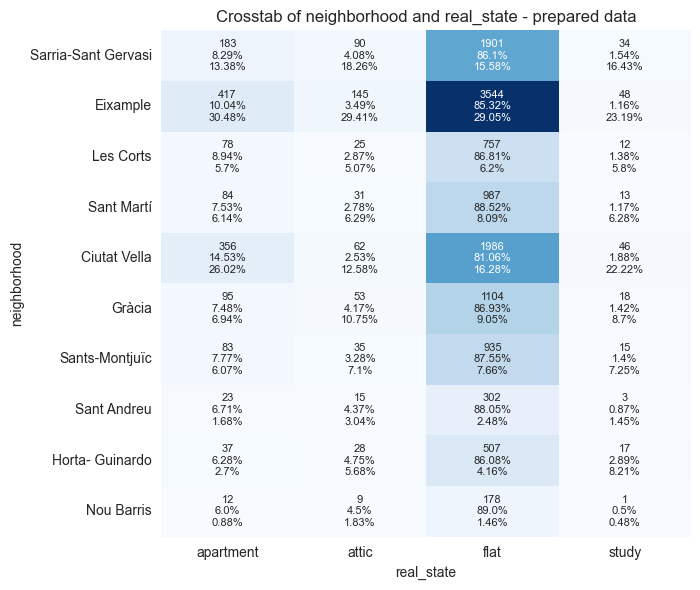

In [127]:
plot_crosstab_heat_perc(df6, var_interest='real_state',df_name="prepared data")

- Selected real_state_flat and neighborhood_Eixample as the base line categories for one-hot encoding

In [128]:
X_train, X_test, y_train, y_test = preprocess_data(
    data=data, 
    target_feature="price", 
    drop_features=["price", "square_meters_price", "rooms", "bathroom"],
    scale_features=["square_meters"], 
    categorical_features=["real_state", "neighborhood"], 
    baseline_categories={"real_state": "flat", "neighborhood": "Eixample"}, 
    test_size=0.30, 
    random_state=1
)


In [129]:
# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])

In [130]:
%%time
# Loop through each model, train it, evaluate it, and store results
for model_name, model in regression_models.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    metrics["Model"] = model_name  # Add model name for reference
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

CPU times: total: 15.8 s
Wall time: 17.2 s


In [131]:
# Display the results DataFrame
results_df.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
0,Linear Regression,203.946460,68259.489536,261.265171,0.511358
2,Ridge Regression,203.959557,68260.799293,261.267677,0.511349
1,Lasso Regression,205.169206,68709.866263,262.125669,0.508134
5,K-Nearest Neighbors,204.794534,74634.435609,273.193037,0.465722
4,Random Forest,204.137710,75186.315334,274.201231,0.461772
6,Support Vector Regressor,216.052970,89802.139881,299.670052,0.357143
3,Decision Tree,234.710616,106803.656248,326.808287,0.235436


In [132]:
# Drop the constant column
X_train_vif = X_train.drop(columns=['const'])

vif_series = pd.Series(
    [variance_inflation_factor(X_train_vif.values, i) for i in range(X_train_vif.shape[1])],
    index=X_train_vif.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

lift                                2.020784
terrace                             1.325467
square_meters                       1.103906
real_state_apartment                1.082000
real_state_attic                    1.093367
real_state_study                    1.049390
neighborhood_Sarria-Sant Gervasi    1.255990
neighborhood_Les Corts              1.098590
neighborhood_Sant Martí             1.121619
neighborhood_Ciutat Vella           1.207858
neighborhood_Gràcia                 1.118434
neighborhood_Sants-Montjuïc         1.105899
neighborhood_Sant Andreu            1.037034
neighborhood_Horta- Guinardo        1.053019
neighborhood_Nou Barris             1.018164
dtype: float64



- There is no multicolinearity in the data, suggesting the real state distribution in terms of number of rooms and bathrooms is not as relevant as the real state area, type and neighborhood
- Linear Regression and Ridge Regression are the best models among those tested, but R² scores suggest that the models are not explaining a significant portion of the variance in the target variable.
- More advanced models will be included in the evaluation

In [133]:
# Define a dictionary of regression models
regression_models_2 = {
    "Decision Tree tuned": DecisionTreeRegressor(max_depth=10, min_samples_split=5),
    "Random Forest tuned": RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=200),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5),
    "XGBoost": xgb.XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5),
    "LightGBM": lgb.LGBMRegressor(n_estimators=200, learning_rate=0.1, max_depth=5),
    #"CatBoost": catb.CatBoostRegressor(iterations=200, learning_rate=0.1, depth=5, verbose=0),
    "Neural Network (MLP)": MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
}

In [134]:
# Initialize an empty DataFrame to store results
results_df_2 = pd.DataFrame(columns=["Model", "MAE", "MSE", "RMSE", "R2 Score"])

In [135]:
%%time
# Loop through each model, train it, evaluate it, and store results
for model_name, model in regression_models_2.items():
    model.fit(X_train, y_train)
    metrics = evaluate_model(model, X_test, y_test)
    metrics["Model"] = model_name  # Add model name for reference
    results_df_2 = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 283
[LightGBM] [Info] Number of data points in the train set: 9988, number of used features: 15
[LightGBM] [Info] Start training from score 1124.081798
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [136]:
# Display the results DataFrame
results_df_2.sort_values(by="R2 Score", ascending=False)

,Model,MAE,MSE,RMSE,R2 Score
7,Neural Network (MLP),201.197523,66634.504777,258.136601,0.522991
0,Linear Regression,203.946460,68259.489536,261.265171,0.511358
2,Ridge Regression,203.959557,68260.799293,261.267677,0.511349
1,Lasso Regression,205.169206,68709.866263,262.125669,0.508134
5,K-Nearest Neighbors,204.794534,74634.435609,273.193037,0.465722
4,Random Forest,204.137710,75186.315334,274.201231,0.461772
6,Support Vector Regressor,216.052970,89802.139881,299.670052,0.357143
3,Decision Tree,234.710616,106803.656248,326.808287,0.235436


# 7. Deployment
Implementing the model in a production environment, making it accessible for real-world use. This might involve integrating the model with existing systems or deploying it via APIs or cloud platforms.

# 8. Monitoring and Maintenance
Continuously monitoring the model's performance in production to ensure its accuracy and relevance over time. This stage may also involve retraining the model as new data becomes available.

# 9. Communication and Reporting
Presenting findings and results to stakeholders in a clear and actionable manner, often through dashboards, visualizations, or reports.